In [312]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [313]:
#Chargement du fichier df
df=pd.read_csv('df.csv')

In [314]:
df.head()

,Zone,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
0,Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80
1,Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28
2,Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38
3,Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92
4,Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59


In [315]:
df.describe()

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
count,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,4.280226e+07,7.130059,673.343195,103.059172,86.710059,701.875740,14254.354915,-0.060651
std,1.544207e+08,5.649365,2192.268544,460.891381,184.540497,2493.867885,19630.673171,0.901920
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.940000
25%,2.402633e+06,1.970000,29.000000,0.000000,3.000000,11.000000,1937.924543,-0.630000
50%,9.487203e+06,6.490000,98.000000,1.000000,16.000000,65.000000,5960.707147,0.000000
75%,2.912146e+07,10.440000,342.000000,12.000000,79.000000,340.000000,17584.598912,0.650000
max,1.421022e+09,27.870000,18266.000000,4223.000000,1069.000000,21914.000000,110203.008207,1.600000


## 1 PCA

In [316]:
df=df.set_index('Zone')

In [317]:
Zone=df.index
Zone

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Zone', length=169)

In [318]:
features = df.columns
features

Index(['population',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Production', 'Pib_par_habitant',
       'stabilité_politique'],
      dtype='object')

In [319]:
X = df.values
X

array([[ 3.62961130e+07,  5.40000000e-01,  5.70000000e+01, ...,
         2.80000000e+01,  5.30149831e+02, -2.80000000e+00],
       [ 5.70097560e+07,  1.41100000e+01,  2.11800000e+03, ...,
         1.66700000e+03,  6.72392858e+03, -2.80000000e-01],
       [ 2.88416900e+06,  6.26000000e+00,  4.70000000e+01, ...,
         1.30000000e+01,  4.52175222e+03,  3.80000000e-01],
       ...,
       [ 2.78348190e+07,  3.04000000e+00,  2.46000000e+02, ...,
         1.68000000e+02,  6.12353054e+02, -2.94000000e+00],
       [ 1.68535990e+07,  1.15000000e+00,  6.00000000e+01, ...,
         4.90000000e+01,  1.49543766e+03,  1.50000000e-01],
       [ 1.42365950e+07,  1.59000000e+00,  7.60000000e+01, ...,
         6.90000000e+01,  1.49417014e+03, -7.10000000e-01]])

In [320]:
type(X)

numpy.ndarray

# 1.1 Scaling

In [321]:
# mettre à l'échelle toutes les données
scaler = StandardScaler()

In [322]:
#centrage et à la réduction des données
scaler.fit(X)

StandardScaler()

In [323]:
#on transforme les données
X_scaled = scaler.transform(X)
X_scaled[:7]

array([[-0.04225782, -1.16997977, -0.28197952, -0.22427289, -0.31365235,
        -0.2710161 , -0.70119808, -3.04626777],
       [ 0.09227851,  1.23919822,  0.66093636, -0.08717503,  2.32230733,
         0.38814903, -0.38474509, -0.24392515],
       [-0.25927036, -0.15446775, -0.28655456, -0.22427289, -0.26473763,
        -0.27704873, -0.49725884,  0.49002173],
       [-0.00917799, -0.91610177, -0.18132862, -0.22427289, -0.4603965 ,
        -0.17167883, -0.51702208, -0.95563121],
       [ 0.25886803,  0.14734526,  0.48754232,  1.18152421,  4.10497697,
         0.32661622,  1.5540097 ,  0.72355028],
       [-0.08434156, -0.62671635, -0.16211345, -0.22427289,  1.03421982,
        -0.26538565, -0.52173556, -0.35512922],
       [-0.27738341,  1.88898388, -0.30485472, -0.22427289, -0.43322165,
        -0.282277  ,  0.09483717,  0.9014768 ]])

In [324]:
s_scaler=StandardScaler()
scaled_data=s_scaler.fit_transform(X)
scaled_data[:7]

array([[-0.04225782, -1.16997977, -0.28197952, -0.22427289, -0.31365235,
        -0.2710161 , -0.70119808, -3.04626777],
       [ 0.09227851,  1.23919822,  0.66093636, -0.08717503,  2.32230733,
         0.38814903, -0.38474509, -0.24392515],
       [-0.25927036, -0.15446775, -0.28655456, -0.22427289, -0.26473763,
        -0.27704873, -0.49725884,  0.49002173],
       [-0.00917799, -0.91610177, -0.18132862, -0.22427289, -0.4603965 ,
        -0.17167883, -0.51702208, -0.95563121],
       [ 0.25886803,  0.14734526,  0.48754232,  1.18152421,  4.10497697,
         0.32661622,  1.5540097 ,  0.72355028],
       [-0.08434156, -0.62671635, -0.16211345, -0.22427289,  1.03421982,
        -0.26538565, -0.52173556, -0.35512922],
       [-0.27738341,  1.88898388, -0.30485472, -0.22427289, -0.43322165,
        -0.282277  ,  0.09483717,  0.9014768 ]])

In [325]:
idx = ["mean", "std"]
idx

['mean', 'std']

In [326]:
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 1.2 Réalisation de la PCA

In [327]:
n_components = 7

In [328]:
pca = PCA(n_components=n_components)

In [329]:
pca.fit(X_scaled)

PCA(n_components=7)

## 1.3 Explained variance & scree plot

In [330]:
#Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :
pca.explained_variance_ratio_

array([0.40099081, 0.25627078, 0.1145149 , 0.09261903, 0.06687523,
       0.0490114 , 0.01966481])

In [331]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([40.1 , 25.63, 11.45,  9.26,  6.69,  4.9 ,  1.97])

In [332]:
#Affichage de la variance cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 40.,  66.,  77.,  86.,  93.,  98., 100.])

In [333]:
#Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

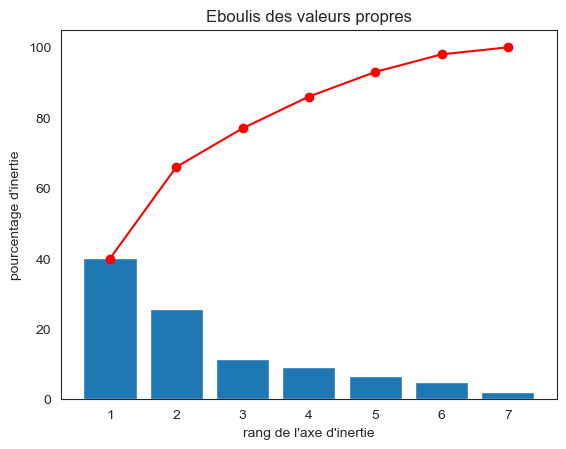

In [334]:
#Réalisation de l'Eboulis
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

==>On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée. On voit ici que près de 77% 
de la variance est comprise dans les 3 premières composantes, et près de 86% dans les 4 premières.

## 1.4 Components

In [335]:
pcs = pca.components_
pcs

array([[ 3.54673662e-01,  1.88978460e-01,  5.32680451e-01,
         4.38717595e-01,  2.05876341e-01,  5.35514033e-01,
         1.71934164e-01,  5.95855742e-02],
       [ 2.86769350e-01, -4.91368285e-01,  1.48051471e-01,
        -8.05933069e-04, -1.80211097e-01,  1.39887123e-01,
        -5.32275450e-01, -5.64835427e-01],
       [ 2.59486714e-01, -1.29367470e-01, -2.38894187e-02,
        -3.59197698e-01,  8.62095430e-01, -1.45488522e-01,
         6.45631634e-02, -1.33391042e-01],
       [ 6.31387866e-01, -2.01021612e-01,  5.69592679e-02,
        -4.53749266e-01, -3.62966371e-01, -1.10217341e-02,
         2.26464105e-01,  4.10676106e-01],
       [ 2.14965390e-01,  7.75422726e-01,  4.40086645e-02,
        -3.09728855e-01, -5.34326071e-02, -1.80688627e-02,
        -4.96053514e-01, -7.34175394e-02],
       [ 9.38725434e-02,  2.38414043e-01, -3.39557996e-02,
        -1.31403432e-01, -2.10095542e-01, -4.55777408e-02,
         6.19818511e-01, -6.96802969e-01],
       [ 5.20501751e-01,  8.701258

In [336]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.354674,0.188978,0.532680,0.438718,0.205876,0.535514,0.171934,0.059586
1,0.286769,-0.491368,0.148051,-0.000806,-0.180211,0.139887,-0.532275,-0.564835
2,0.259487,-0.129367,-0.023889,-0.359198,0.862095,-0.145489,0.064563,-0.133391
3,0.631388,-0.201022,0.056959,-0.453749,-0.362966,-0.011022,0.226464,0.410676
4,0.214965,0.775423,0.044009,-0.309729,-0.053433,-0.018069,-0.496054,-0.073418
5,0.093873,0.238414,-0.033956,-0.131403,-0.210096,-0.045578,0.619819,-0.696803
6,0.520502,0.087013,-0.505625,0.584267,0.028867,-0.349572,-0.037720,-0.005039


In [337]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
F1,0.35,0.19,0.53,0.44,0.21,0.54,0.17,0.06
F2,0.29,-0.49,0.15,-0.00,-0.18,0.14,-0.53,-0.56
F3,0.26,-0.13,-0.02,-0.36,0.86,-0.15,0.06,-0.13
F4,0.63,-0.20,0.06,-0.45,-0.36,-0.01,0.23,0.41
F5,0.21,0.78,0.04,-0.31,-0.05,-0.02,-0.50,-0.07
F6,0.09,0.24,-0.03,-0.13,-0.21,-0.05,0.62,-0.70
F7,0.52,0.09,-0.51,0.58,0.03,-0.35,-0.04,-0.01


In [338]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7
population,0.354674,0.286769,0.259487,0.631388,0.214965,0.093873,0.520502
Disponibilité de protéines en quantité (g/personne/jour),0.188978,-0.491368,-0.129367,-0.201022,0.775423,0.238414,0.087013
Disponibilité intérieure,0.532680,0.148051,-0.023889,0.056959,0.044009,-0.033956,-0.505625
Exportations - Quantité,0.438718,-0.000806,-0.359198,-0.453749,-0.309729,-0.131403,0.584267
Importations - Quantité,0.205876,-0.180211,0.862095,-0.362966,-0.053433,-0.210096,0.028867
Production,0.535514,0.139887,-0.145489,-0.011022,-0.018069,-0.045578,-0.349572
Pib_par_habitant,0.171934,-0.532275,0.064563,0.226464,-0.496054,0.619819,-0.037720
stabilité_politique,0.059586,-0.564835,-0.133391,0.410676,-0.073418,-0.696803,-0.005039


<Axes: >

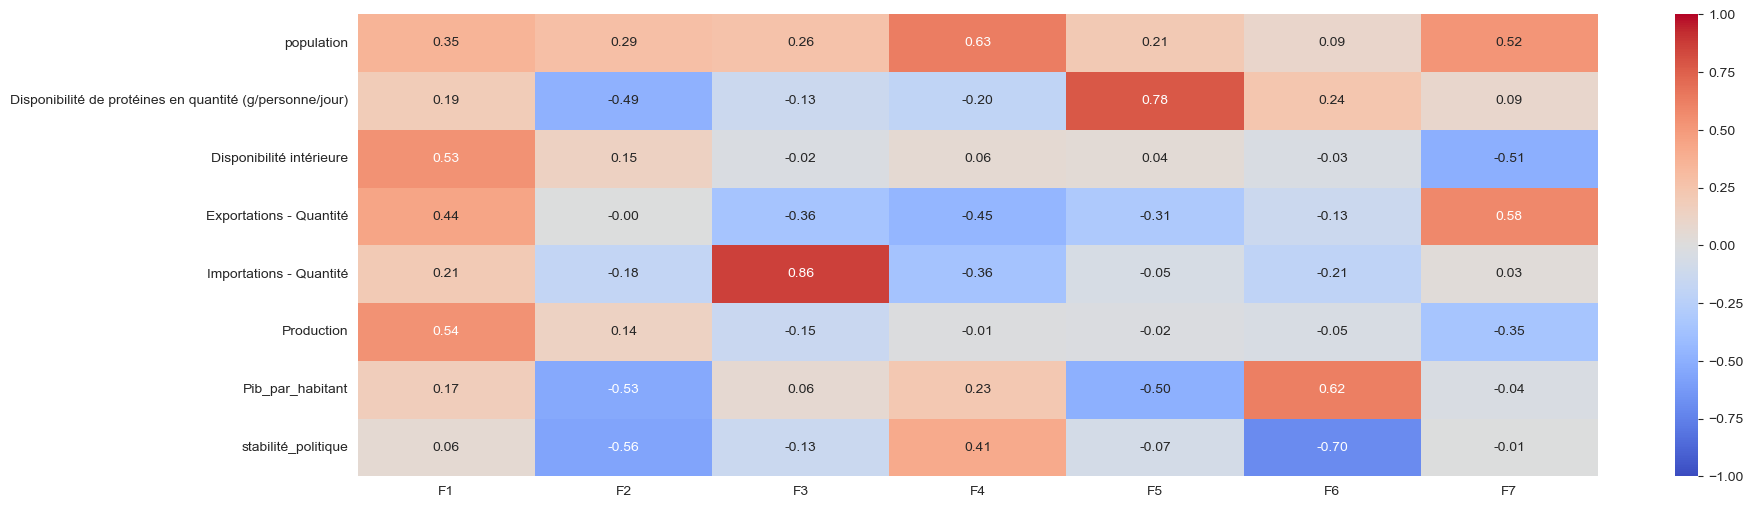

In [339]:
#Carte de chaleure
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")


In [340]:
#création d'une fonction cercle de corrélation
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(20, 10))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [341]:
x, y = 0,1

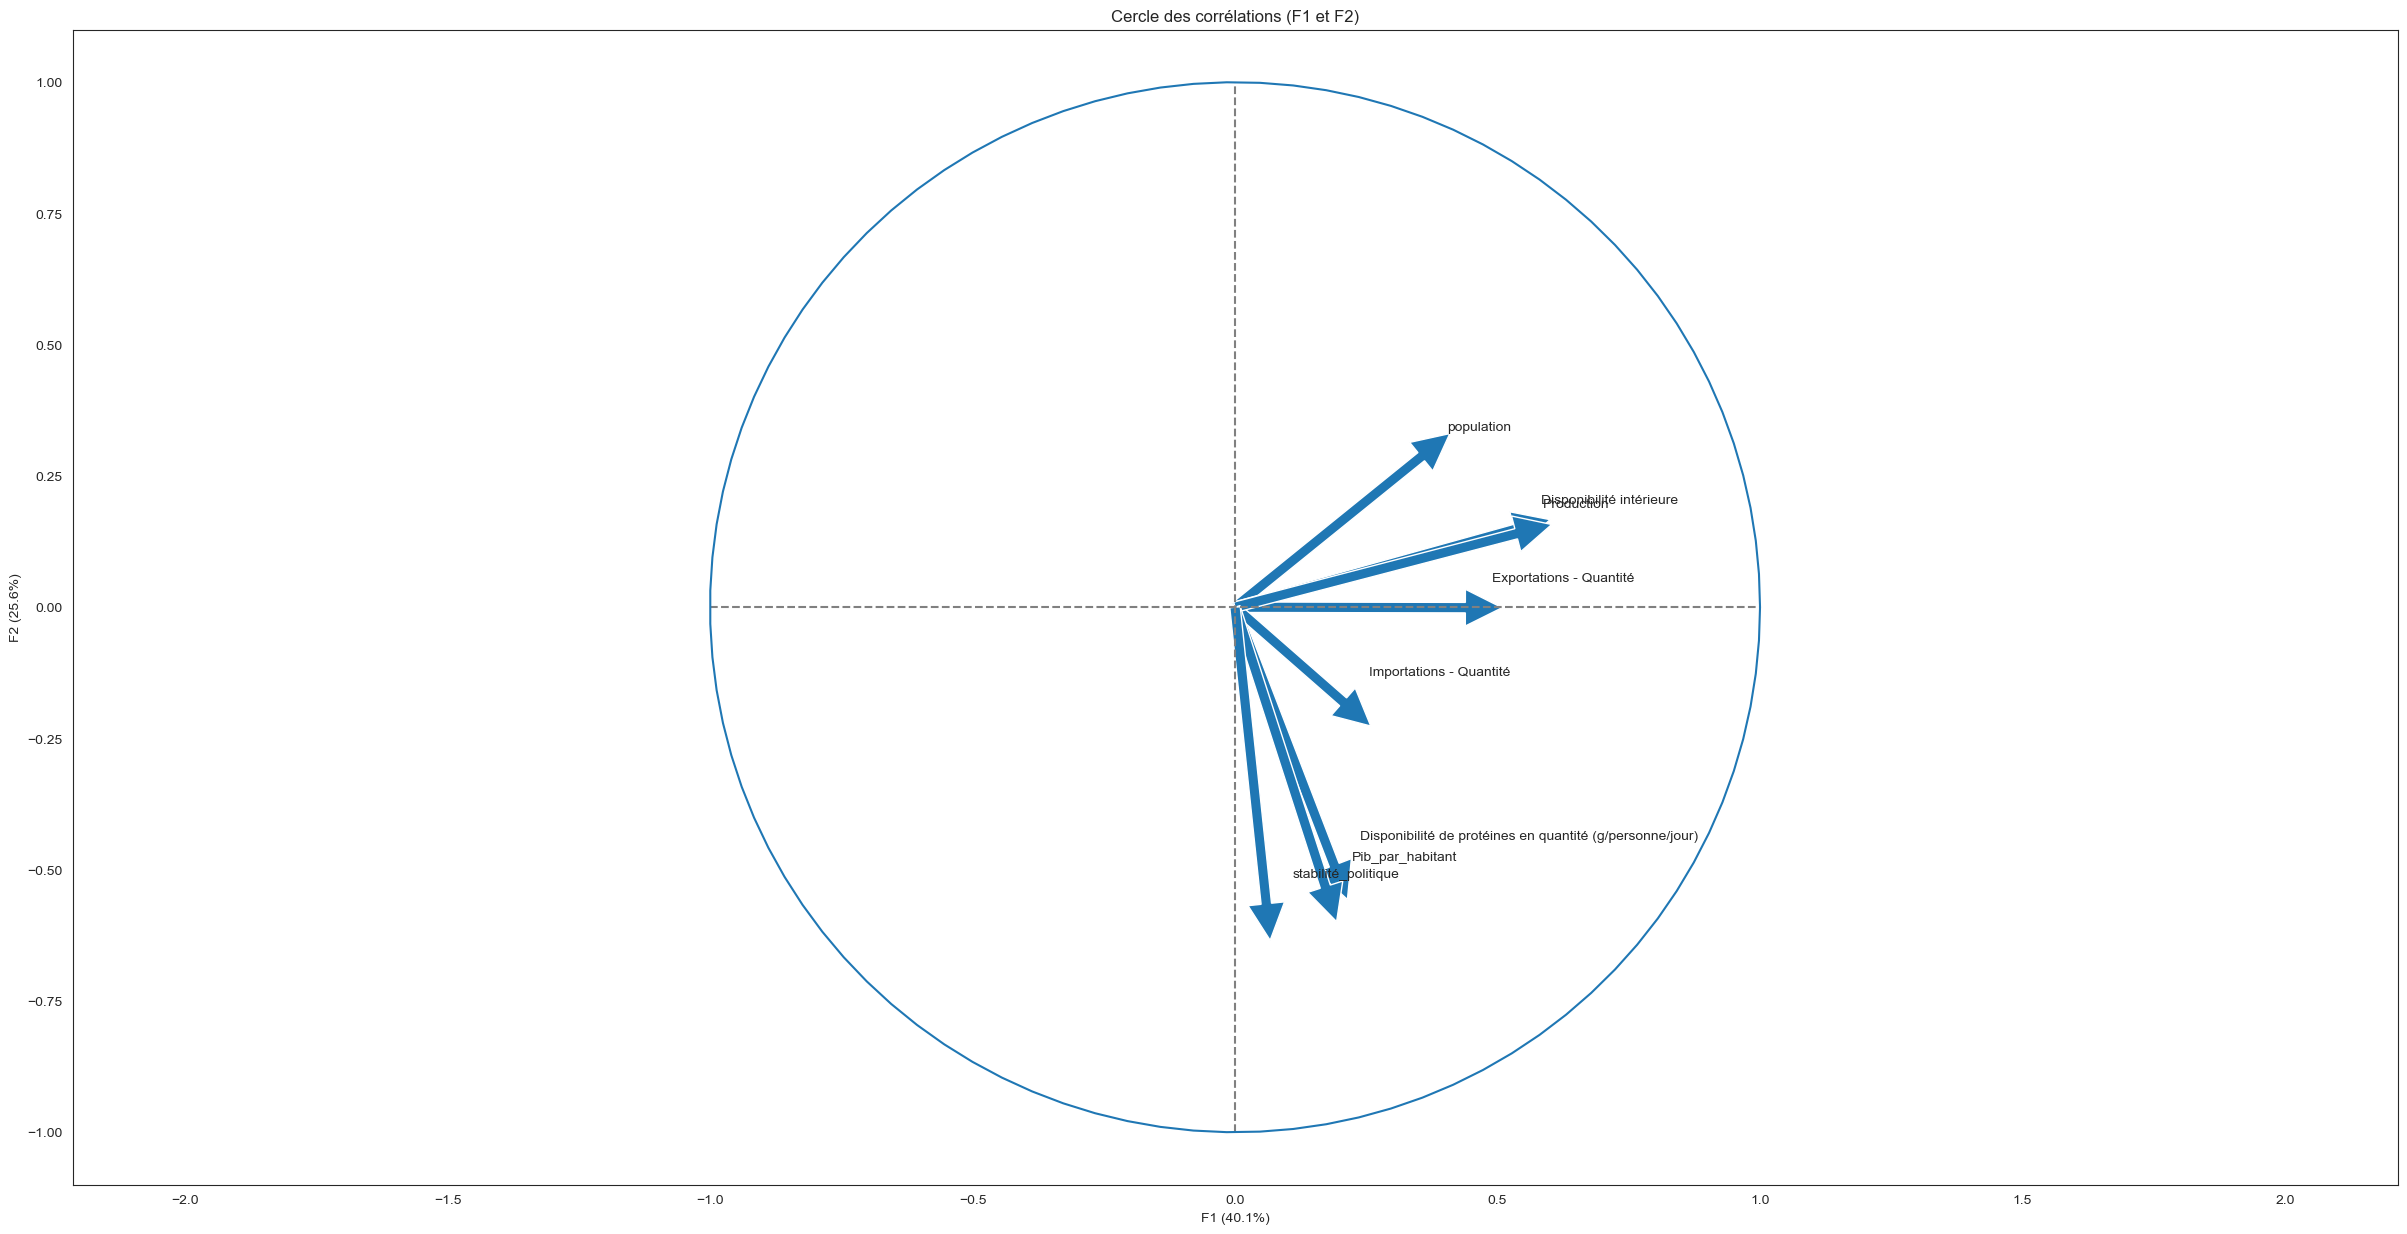

In [342]:
x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1x, y = 0,1

==>les variables exportation,disponibilité_alimentaire et production sont corrélées positivement avec F1,on projettant les individus sur F1 on peut identifier les pays qui exporte ,produit et on une forte disponibilité alimentaire ==>les variables stabilité_politique, PIB et disponibilité de proteines en quantité sont corréles négativement avec F2, on projettant les individus sur F2 on peut identifier les pays riche ,stable et qui on leurs besoin en proteine

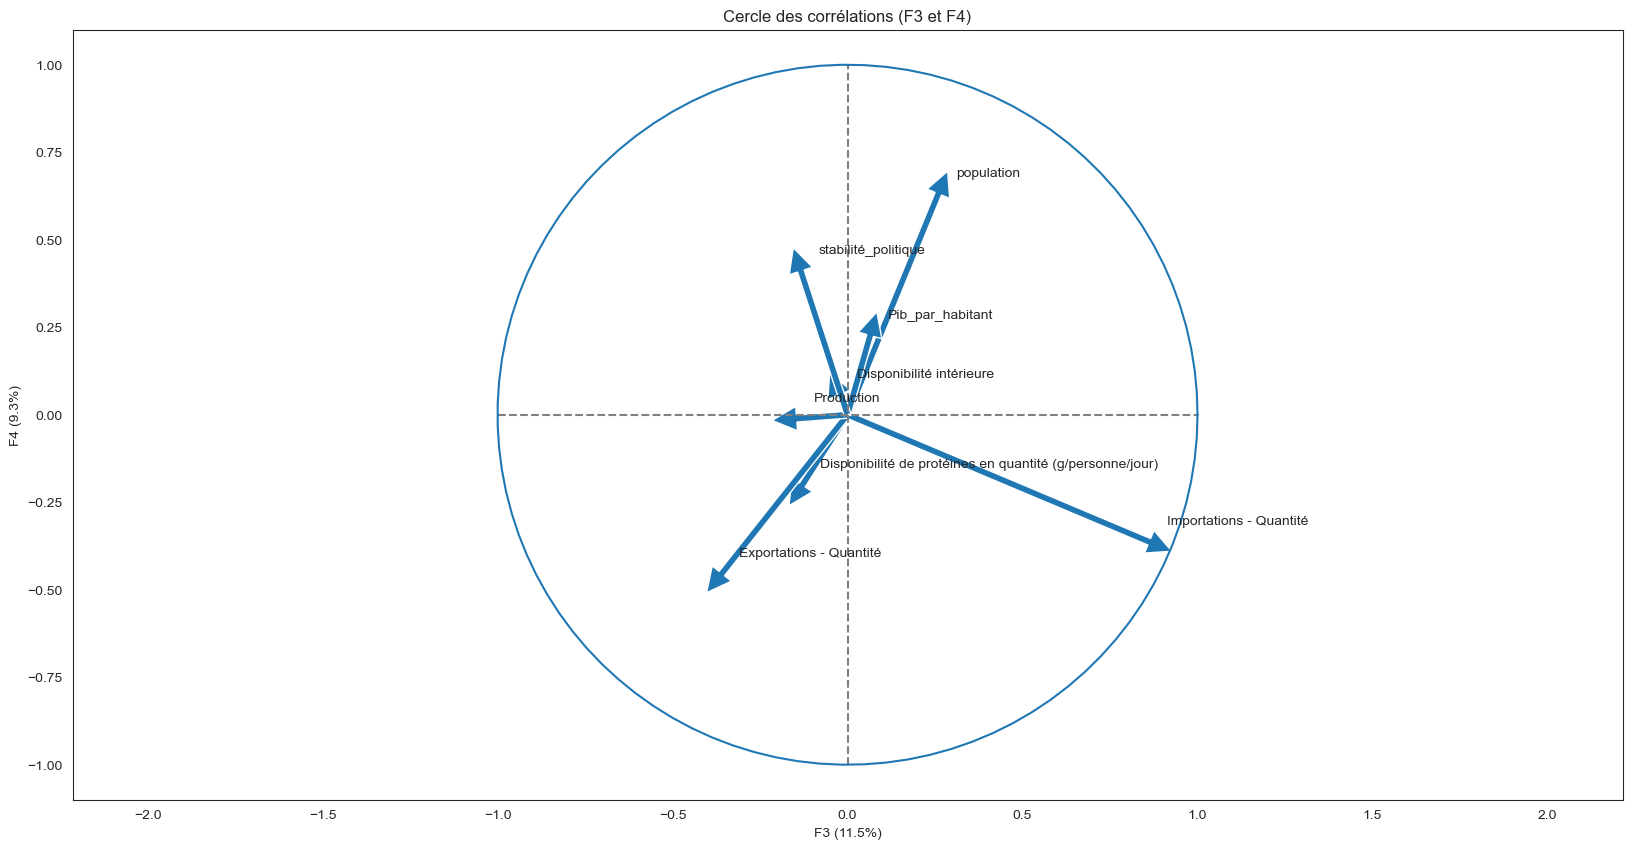

In [343]:
#corrélation des variables avec F3 et F4
correlation_graph(pca, (2,3), features)

==>l'importation est corrélée positivement avec F3,sur F3 on peut identifier le niveau d'importation pour chaque pays. ==>la population est corrélée positivement avec F4 , sur F4 on peut identifier la densité de la population des pays.

## 1.5 Projection

In [344]:
X_proj = pca.transform(X_scaled)
X_proj[:7]

array([[-9.96466190e-01,  2.63368843e+00,  3.57791355e-01,
        -9.98780802e-01, -2.66121160e-01,  1.52242075e+00,
         1.52273766e-02],
       [ 1.18601533e+00, -5.06157767e-01,  1.83243317e+00,
        -1.14814275e+00,  1.11448889e+00, -2.80984584e-01,
        -2.82169456e-01],
       [-6.31346172e-01, -4.38441646e-02, -2.45280992e-01,
         1.40566270e-01,  1.11183324e-01, -6.03376615e-01,
        -2.90438780e-02],
       [-7.03918127e-01,  1.29477159e+00, -7.68140121e-02,
        -7.07445077e-02, -2.96522388e-01,  2.66333090e-01,
        -5.27991307e-02],
       [ 2.22804420e+00, -1.85685729e+00,  3.10724288e+00,
        -1.21901538e+00, -1.22382798e+00, -5.30673250e-01,
         5.33433087e-01],
       [-3.73157840e-01,  5.14736251e-01,  1.08751520e+00,
        -4.71198376e-01, -2.07355601e-01, -4.03475978e-01,
        -3.40351851e-03],
       [-1.72518560e-01, -1.57376637e+00, -6.75045555e-01,
         8.15845227e-02,  1.37620080e+00, -1.34297662e-03,
         1.2114438

In [345]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

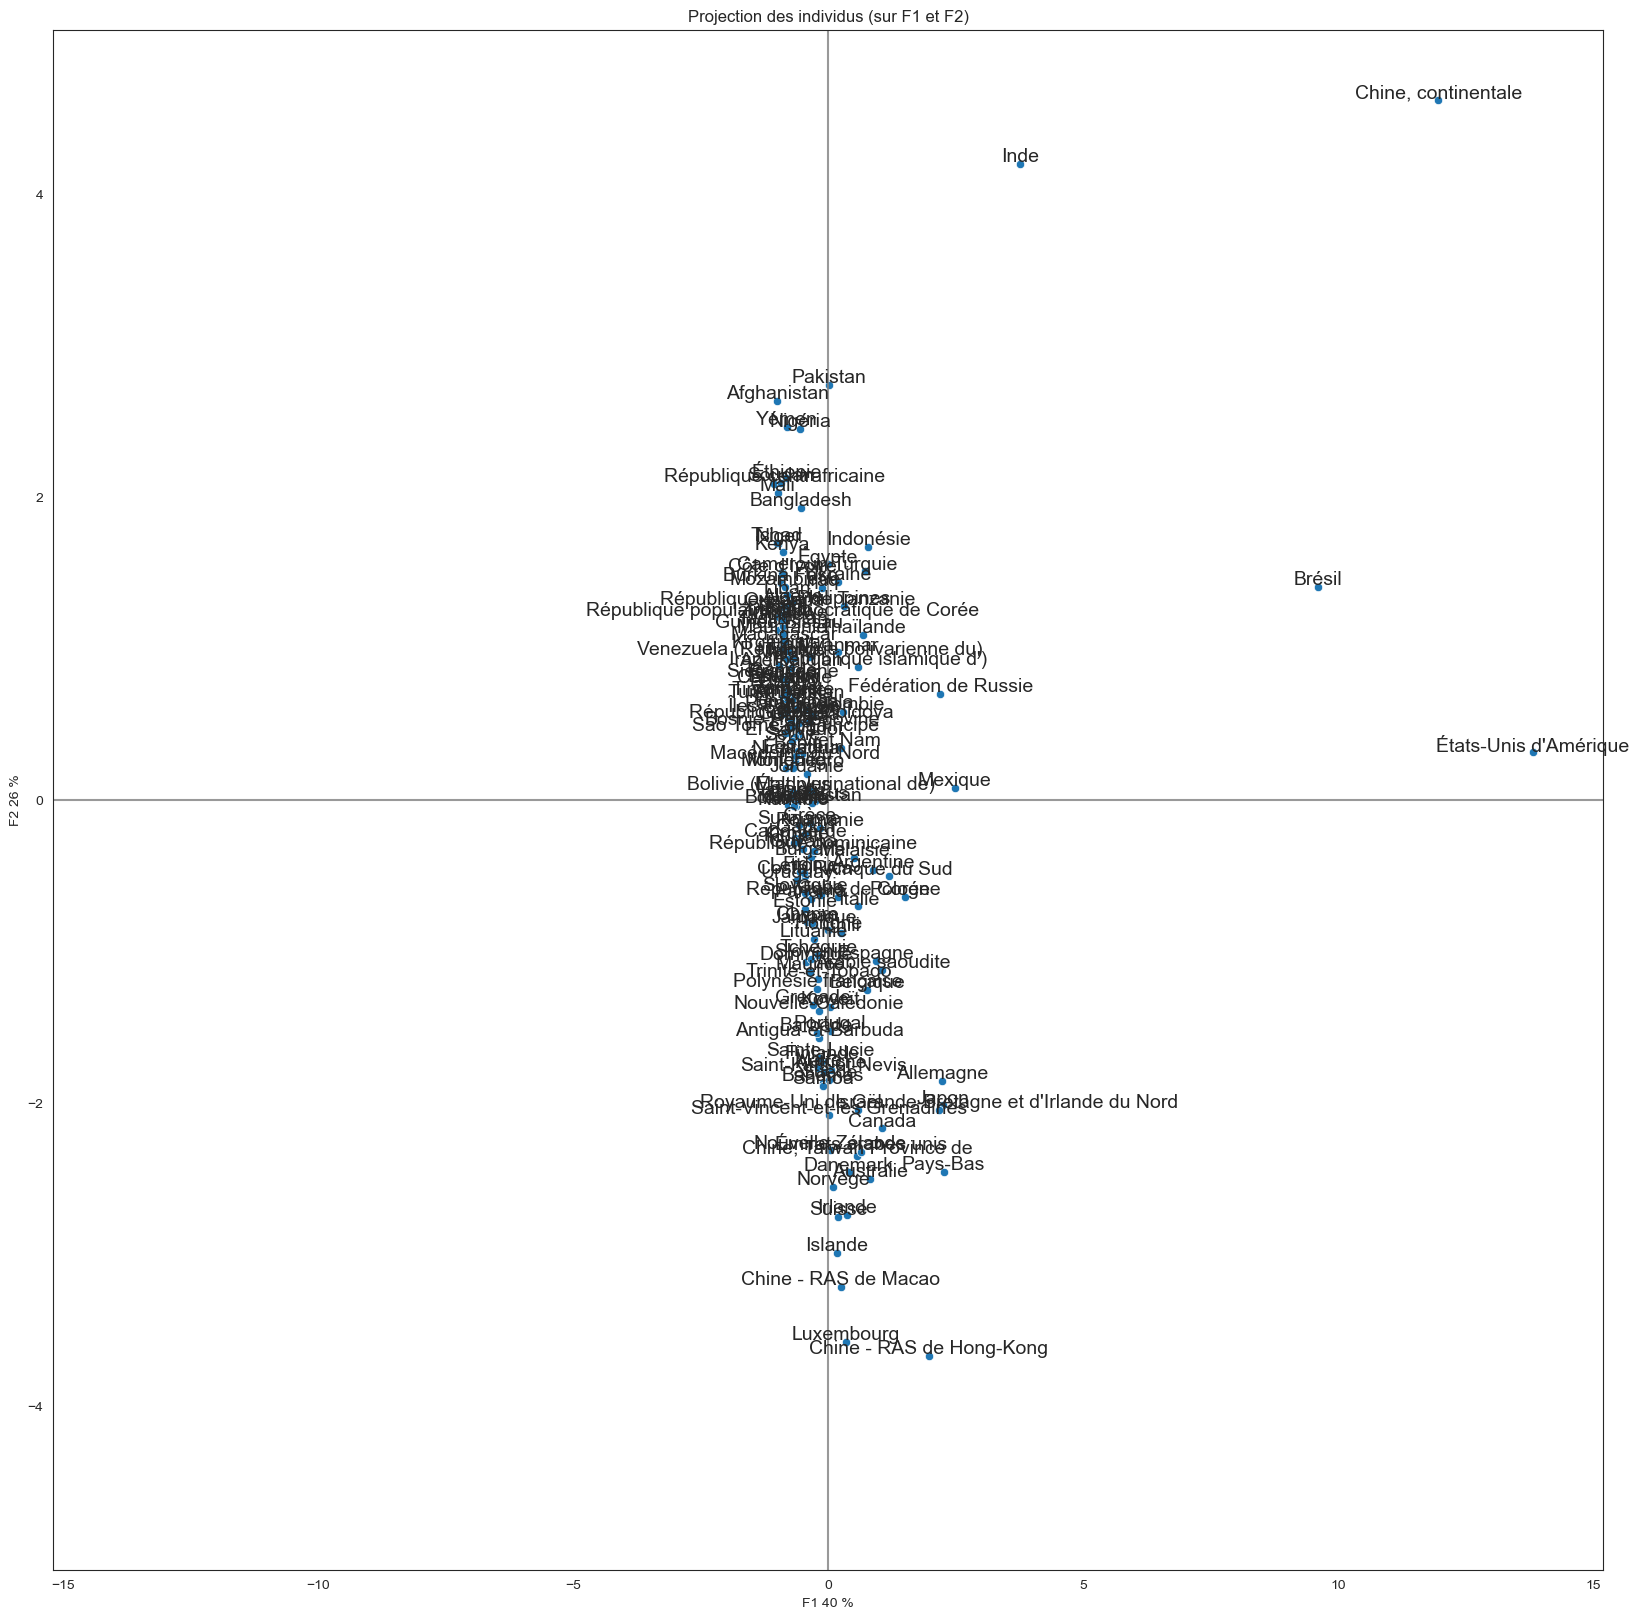

In [346]:
#Projection des pays sur le premier plan factoriel F1 F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,20), labels= Zone, marker="o")

==>les Etats-Unis et le Brésil se sont les pays qui ont une forte exportation, disponibilité alimentaire et production, donc se sont des pays ou l'investissement n'est pas intéressant car leurs ressources s'attifaient leurs besoin et même ont une forte exportation 
==>Luxembourg, Chine Ras de Hong-Kong ,Island, la suisse, Norvège ont une forte stabilité politique, PIB élevé et bonne disponibilité de protéines l'investissement dans ses pays est intéressant car l’ environnement est stable,se sont des pays riche et consomme beaucoup de protéine.
==>contrairement à l'Inde , Chine-Continentale, Pakistan, Afghanistan ,Bangladesh ou il ne faut pas investir car se sont des pays instable et pauvre.


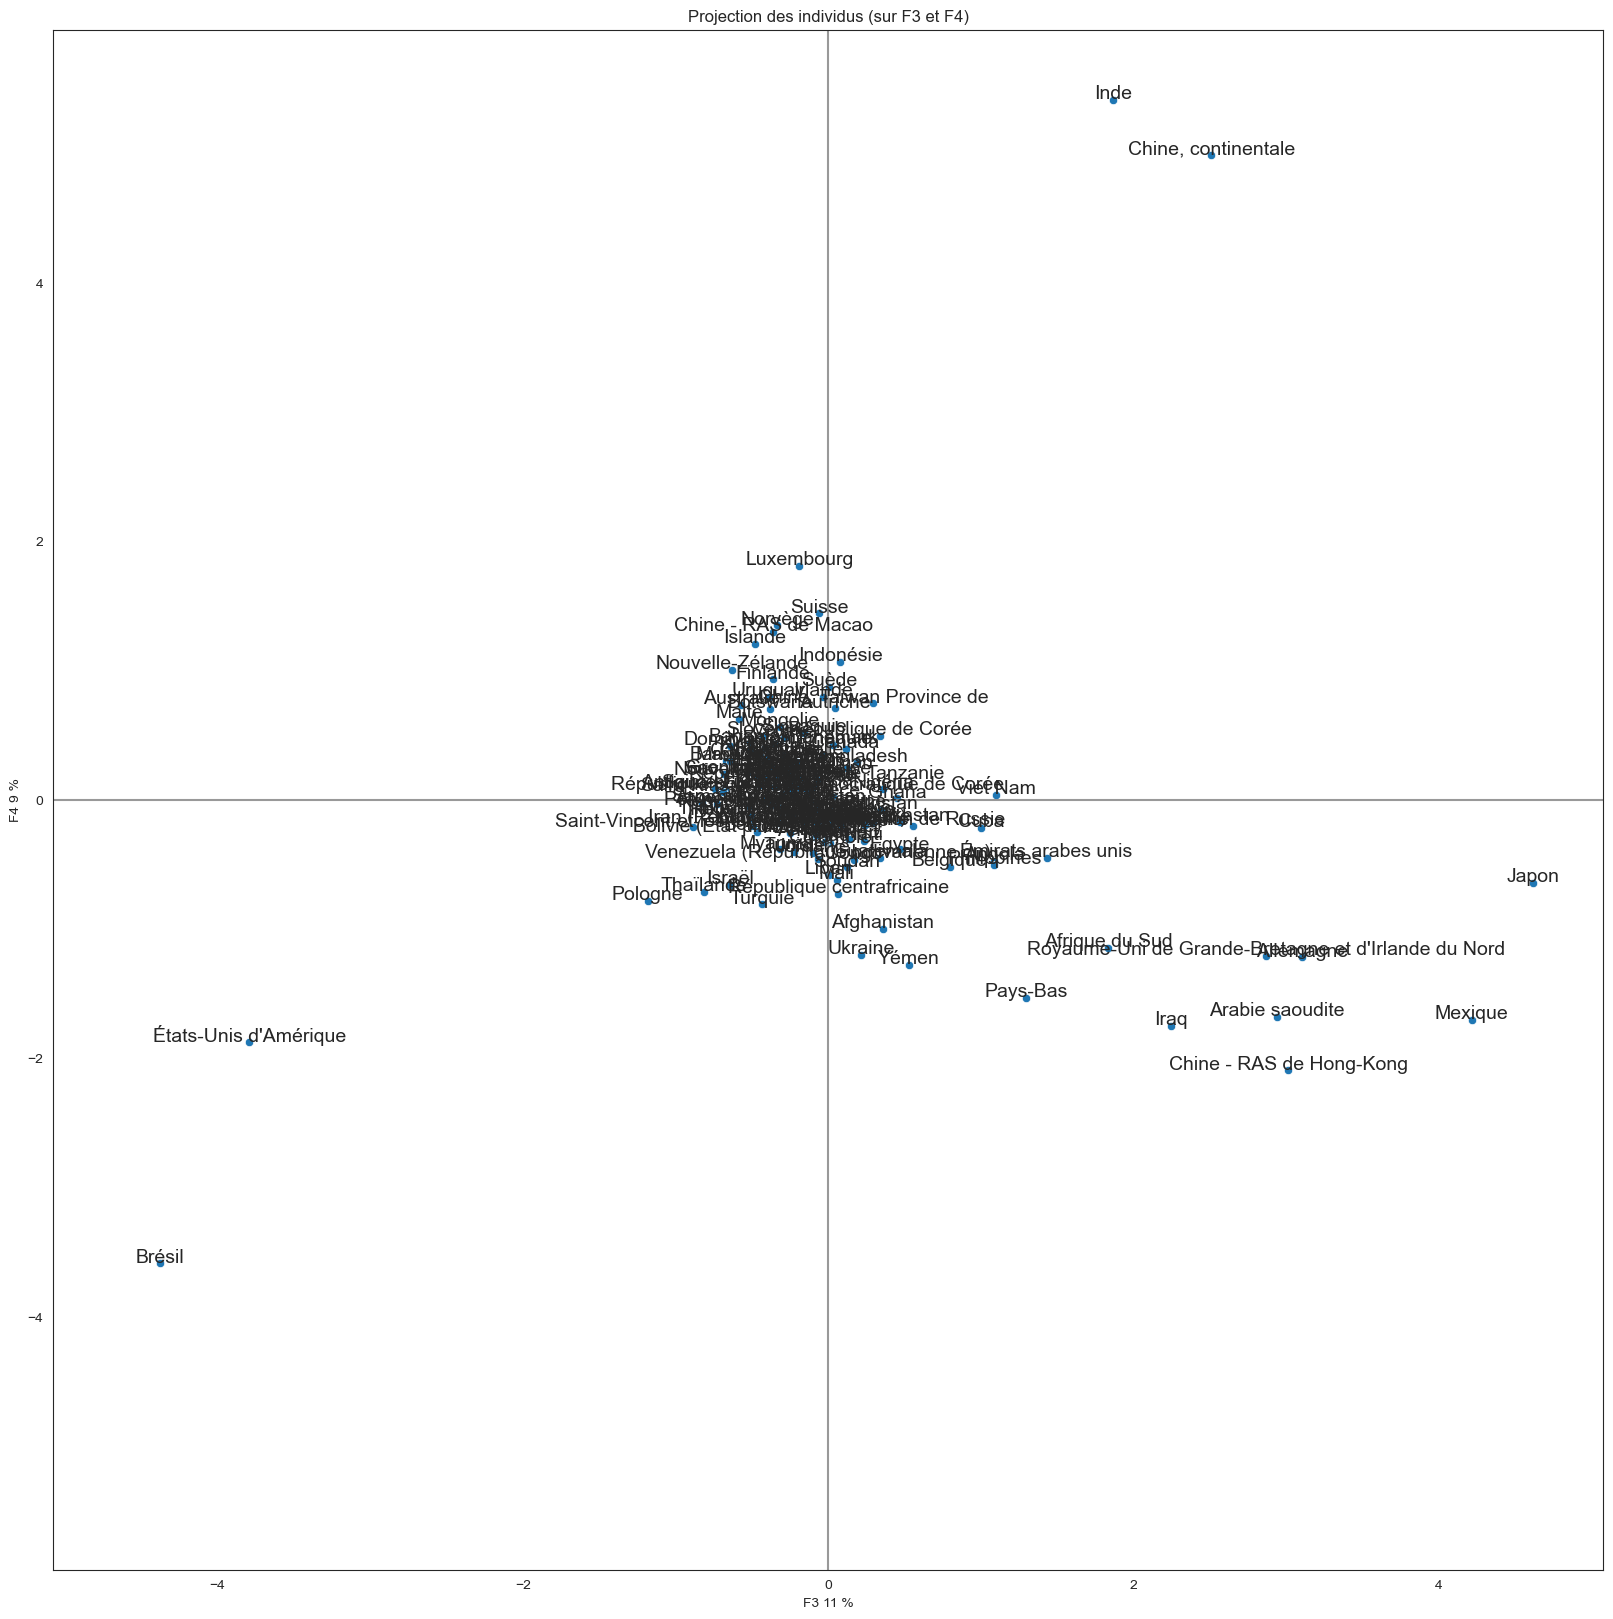

In [347]:
#Projection des pays sur le deuxieme plan factoriel F3 F4
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,20), labels= Zone, marker="o")

==>Le Japon, l'Irland du nord ,la Mexique, Arabie saoudite ,Chine Ras de Hong kong ,l'allemagne, La Grande-Bretagne ,la chine continental se sont les pays qui importe le plus par contre les Etats- Unis et le Brésil les pays qui importe le moins ce qui confirme que l'investisemment n'est pas interessant aux Etats_Unis et au Brésil. ==>L'inde et la chine continentale se sont les pays qui ont la plus forte densité de population

## 2 Clustering

## 2.1 La classification ascendante hiérarchique

## 2.1.1 Linkage

In [348]:
# Choix du data frame utilisé précédemment pour l'ACP
X_scaled

array([[-0.04225782, -1.16997977, -0.28197952, ..., -0.2710161 ,
        -0.70119808, -3.04626777],
       [ 0.09227851,  1.23919822,  0.66093636, ...,  0.38814903,
        -0.38474509, -0.24392515],
       [-0.25927036, -0.15446775, -0.28655456, ..., -0.27704873,
        -0.49725884,  0.49002173],
       ...,
       [-0.09721442, -0.72613711, -0.19551125, ..., -0.21471157,
        -0.69699815, -3.20195347],
       [-0.16853809, -1.06168216, -0.28060701, ..., -0.26257042,
        -0.65187952,  0.23425237],
       [-0.18553569, -0.98356585, -0.27328694, ..., -0.25452692,
        -0.65194428, -0.72210266]])

In [349]:
# Clustering hiérarchique avec la méthode de Ward pour diminuer l'inertie intraclasse
Z = linkage(scaled_data, method = 'ward')

In [350]:
Z= linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,64.0,151.0,0.040496,2.0
1,111.0,152.0,0.061479,2.0
2,58.0,143.0,0.062742,2.0
3,28.0,39.0,0.063529,2.0
4,27.0,135.0,0.081403,2.0
...,...,...,...,...
163,324.0,331.0,13.401027,93.0
164,327.0,332.0,16.436628,103.0
165,328.0,330.0,16.534295,4.0
166,329.0,333.0,19.485461,165.0


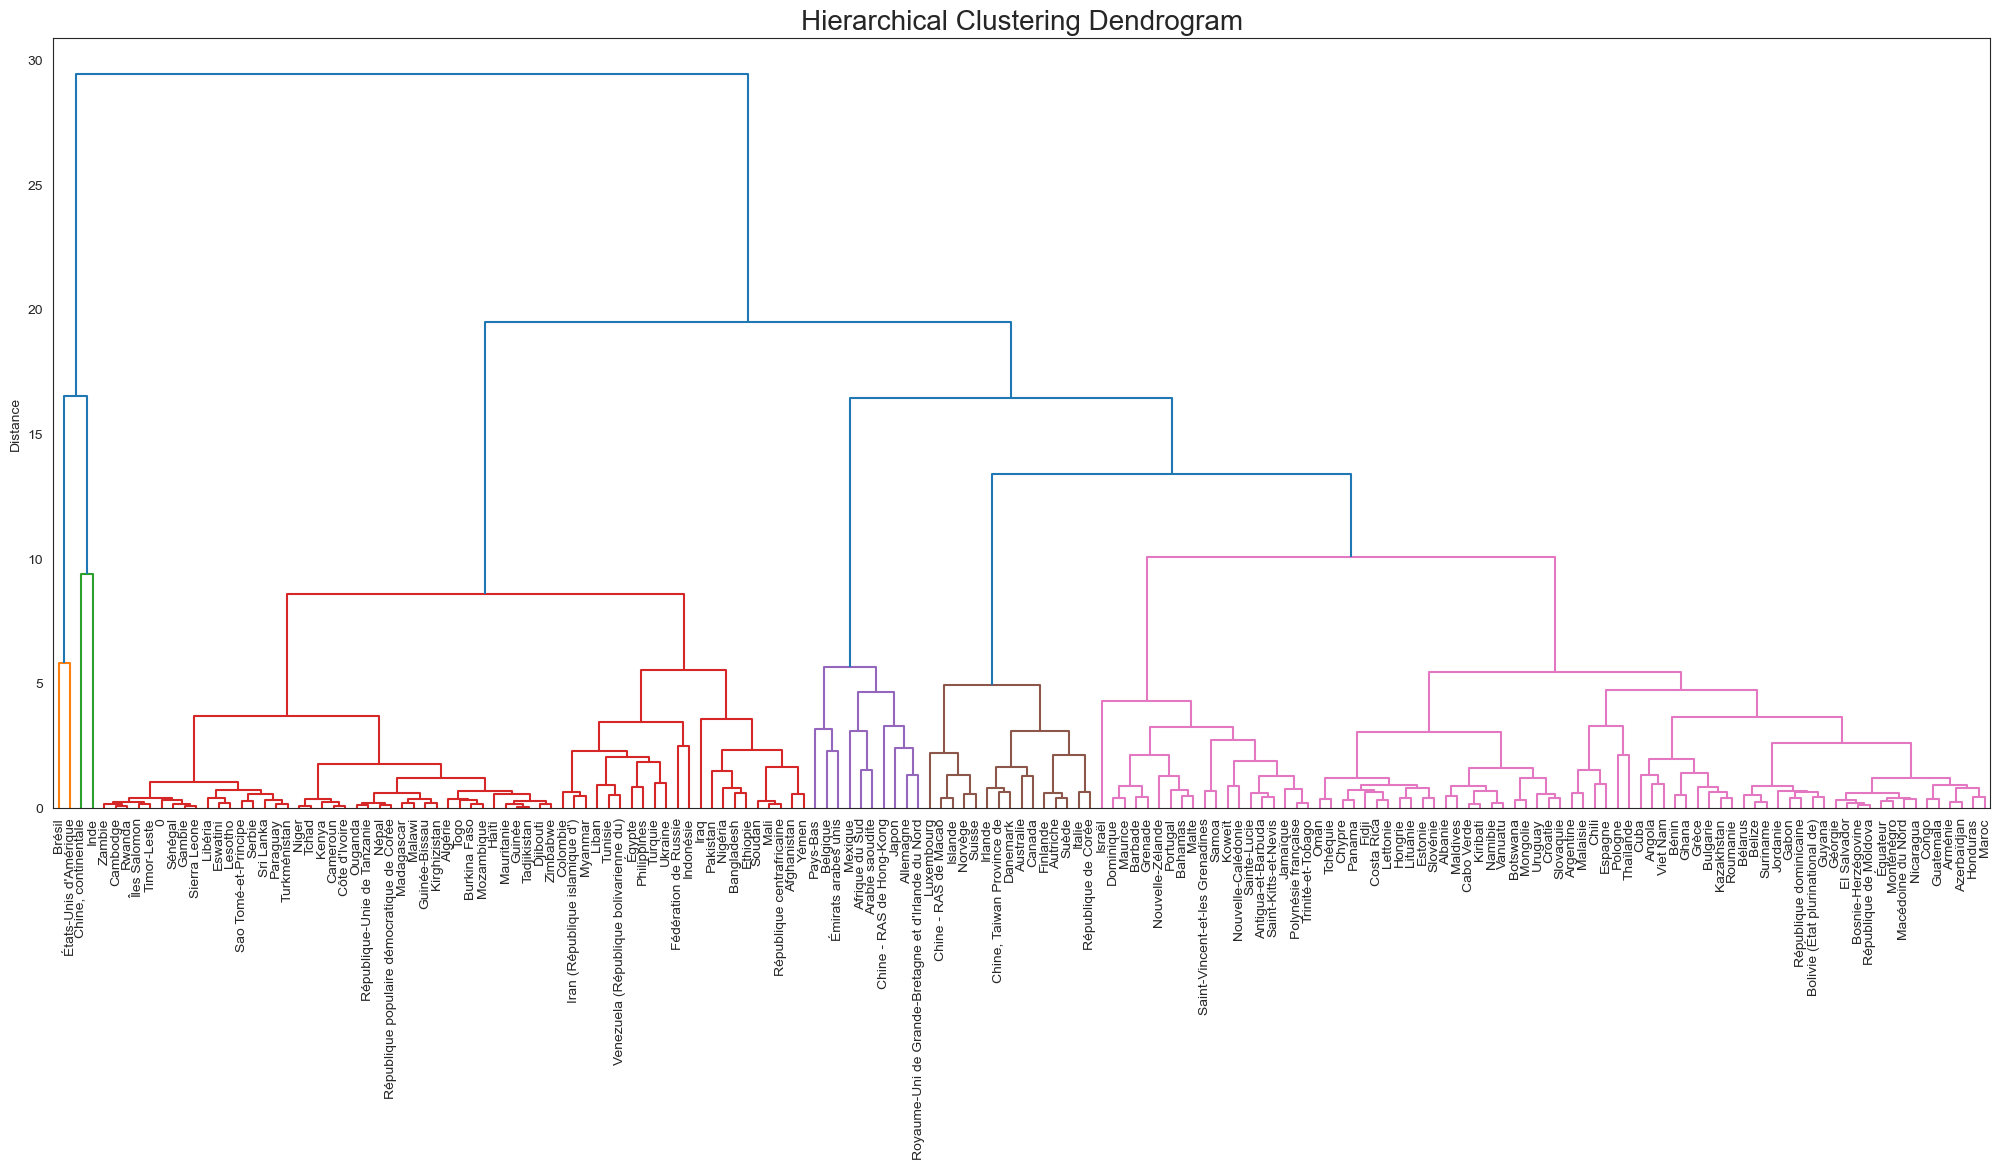

In [351]:
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(25,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = df.index, leaf_font_size=10, color_threshold=12, orientation='top')
plt.show() 

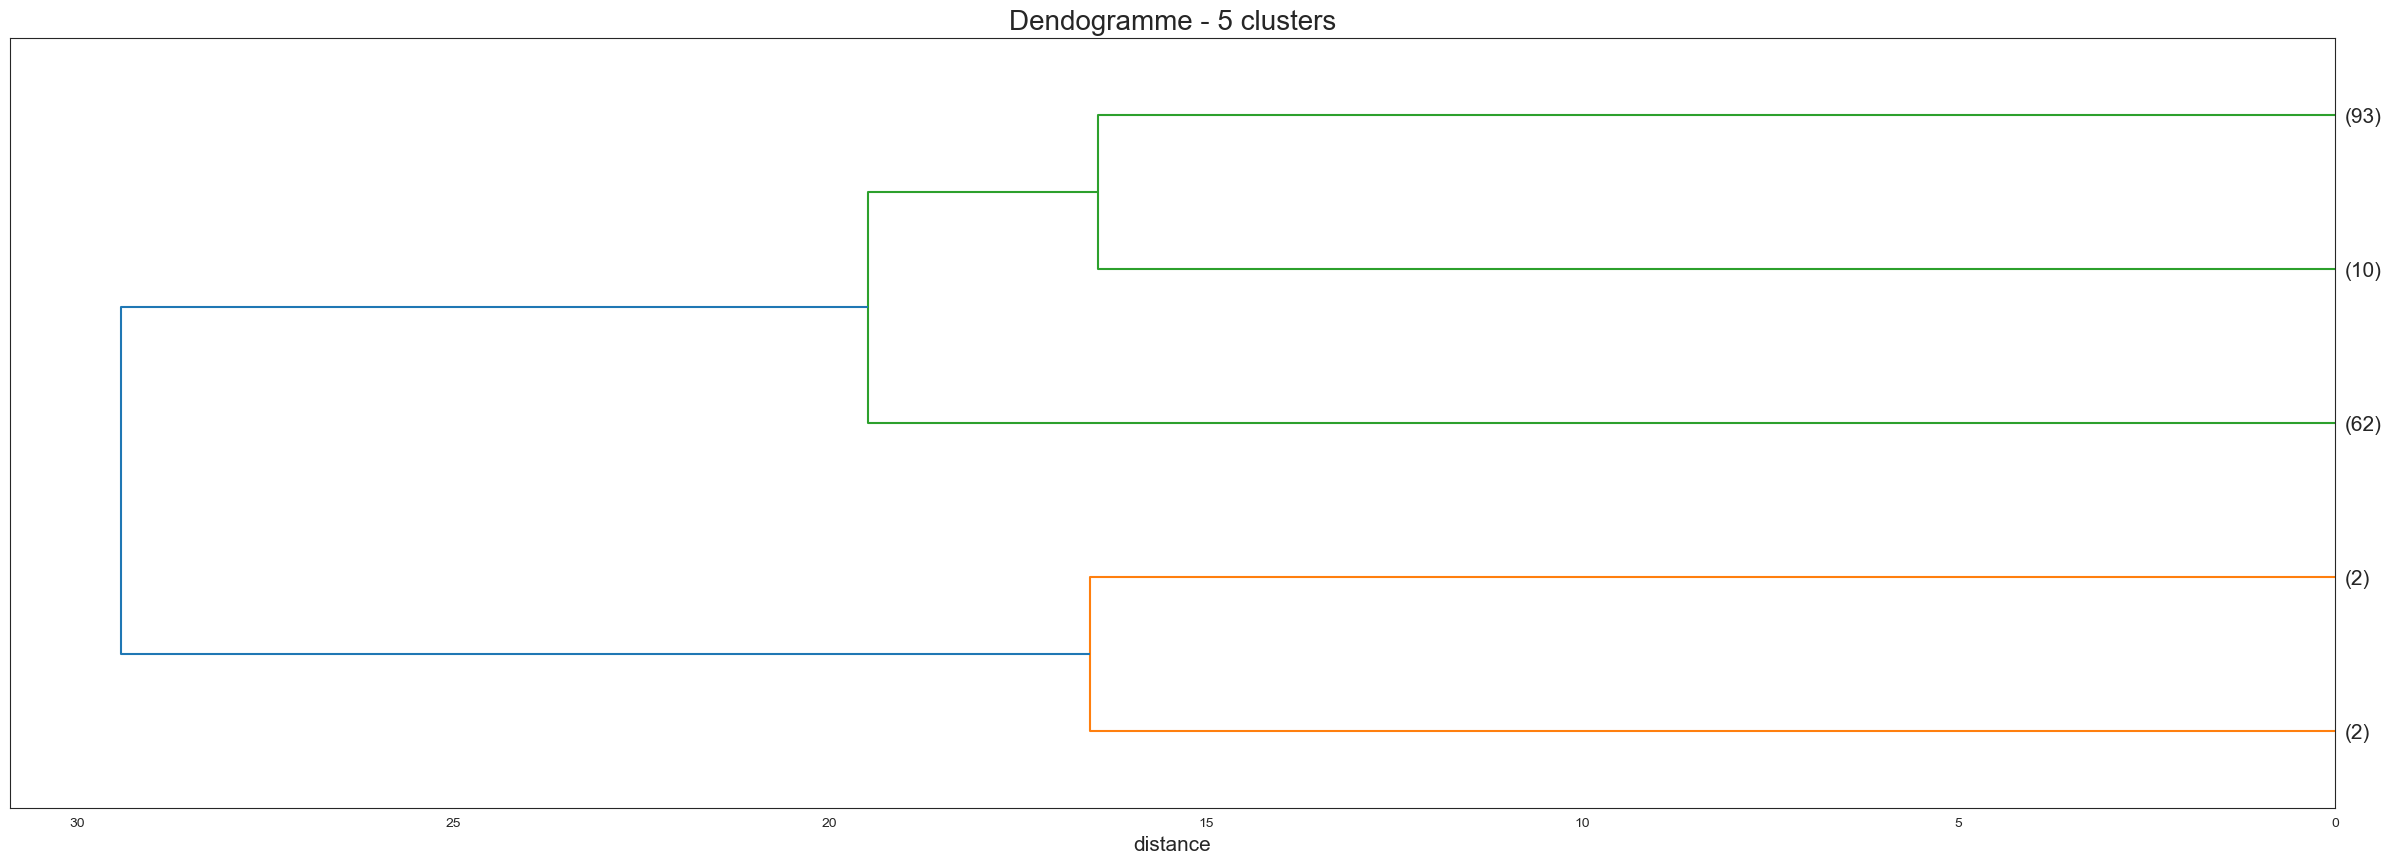

In [352]:
# Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Dendogramme - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = df.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [353]:
# Création d'un modèle de clustering hiérarchique
cah = AgglomerativeClustering(n_clusters=5, linkage="ward")

In [354]:
cah.fit(X_scaled)

AgglomerativeClustering(n_clusters=5)

In [355]:
cah.labels_

array([2, 4, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0,
       0, 3, 0, 2, 0, 2, 2, 0, 0, 4, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 4, 0, 0, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 4, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 4, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 4, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 4, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2], dtype=int64)

In [356]:
dd = {i:j for i,j in enumerate(list("abcde"))}
labels = [dd[i] for i in cah.labels_]
labels[:5]

['c', 'e', 'a', 'c', 'e']

In [357]:
df['cluster'] = labels
df.head()

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster
Zone,,,,,,,,,
Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80,c
Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28,e
Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38,a
Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92,c
Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59,e


In [358]:
#Affichage du nombre de pays dans chaque cluster
df['cluster'].value_counts()

a    93
c    62
e    10
d     2
b     2
Name: cluster, dtype: int64

In [359]:
#calcule de la moyenne mondiale pour chaque variable 
df.mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\1187096352.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


population                                                  4.280226e+07
Disponibilité de protéines en quantité (g/personne/jour)    7.130059e+00
Disponibilité intérieure                                    6.733432e+02
Exportations - Quantité                                     1.030592e+02
Importations - Quantité                                     8.671006e+01
Production                                                  7.018757e+02
Pib_par_habitant                                            1.425435e+04
stabilité_politique                                        -6.065089e-02
dtype: float64

In [360]:
#Affichage de la moyenne de chaque variable pour chaque cluster 
df.groupby('cluster').mean()

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique
cluster,,,,,,,,
a,1.073756e+07,9.602043,265.537634,43.419355,54.096774,271.354839,19624.348777,0.435054
b,1.379849e+09,2.355000,10911.000000,290.000000,226.000000,10890.500000,8090.712272,-0.380000
c,3.879614e+07,2.478226,381.516129,15.419355,30.016129,367.338710,2431.609384,-0.855161
d,2.664593e+08,17.805000,14124.000000,3957.500000,63.000000,18057.500000,34478.156957,-0.090000
e,5.370115e+07,11.802000,1537.600000,392.800000,718.400000,1271.000000,34802.402413,0.325000


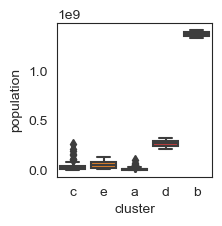

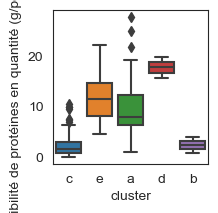

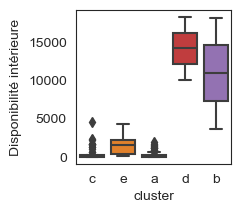

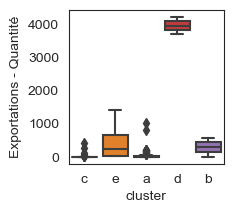

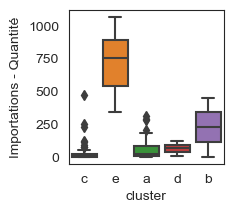

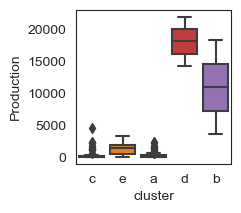

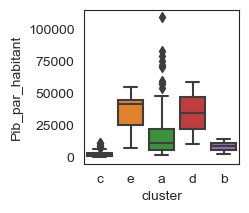

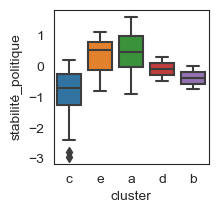

In [361]:
#Réalisation des boxplot pour chaque cluster
cluster=['a','b','c','d','e']
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'population', data=df)
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'Disponibilité de protéines en quantité (g/personne/jour)', data=df)
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'Disponibilité intérieure', data=df)
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'Exportations - Quantité', data=df)
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'Importations - Quantité', data=df)
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'Production', data=df)
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'Pib_par_habitant', data=df)
plt.subplots(figsize=(2,2))
ax = sns.boxplot(x='cluster', y= 'stabilité_politique', data=df)
plt.show()

In [362]:
#Identification des pays du cluster a
df.loc[df['cluster']=='a',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster
Zone,,,,,,,,,
Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38,a
Angola,29816766.0,3.60,319.0,0.0,277.0,42.0,4042.681403,-0.38,a
Antigua-et-Barbuda,95426.0,17.77,7.0,0.0,7.0,0.0,16110.556281,0.75,a
Argentine,43937140.0,13.53,1962.0,207.0,8.0,2161.0,14609.783370,0.17,a
Arménie,2944791.0,5.44,47.0,0.0,35.0,11.0,4041.995072,-0.62,a
...,...,...,...,...,...,...,...,...,...
Thaïlande,69209810.0,4.35,881.0,796.0,2.0,1676.0,6436.789649,-0.75,a
Trinité-et-Tobago,1384059.0,16.63,76.0,0.0,23.0,61.0,16094.666782,0.28,a
Uruguay,3436641.0,2.97,33.0,3.0,3.0,33.0,18769.787523,1.05,a


In [363]:
#Affichage la moyenne des variables du cluster a
df.loc[df['cluster']=='a',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\160983130.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster']=='a',:].mean()


population                                                  1.073756e+07
Disponibilité de protéines en quantité (g/personne/jour)    9.602043e+00
Disponibilité intérieure                                    2.655376e+02
Exportations - Quantité                                     4.341935e+01
Importations - Quantité                                     5.409677e+01
Production                                                  2.713548e+02
Pib_par_habitant                                            1.962435e+04
stabilité_politique                                         4.350538e-01
dtype: float64

==>cluster a faible population, tres bonne disponibilité proteine,faible disponibilité interieure,faible exportation,pas beaucoup d'importation faible prodction bonne stabilité politique pib bon
==>L'investissement peut etre interessant dans ses pays.

In [364]:
#Identification des pays du cluster b
df.loc[df['cluster']=='b',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster
Zone,,,,,,,,,
"Chine, continentale",1.421022e+09,3.96,18161.0,576.0,452.0,18236.0,14243.500000,0.00,b
Inde,1.338677e+09,0.75,3661.0,4.0,0.0,3545.0,1937.924543,-0.76,b


In [365]:
#Affichage la moyenne des variables du cluster b
df.loc[df['cluster']=='b',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\3413569955.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster']=='b',:].mean()


population                                                  1.379849e+09
Disponibilité de protéines en quantité (g/personne/jour)    2.355000e+00
Disponibilité intérieure                                    1.091100e+04
Exportations - Quantité                                     2.900000e+02
Importations - Quantité                                     2.260000e+02
Production                                                  1.089050e+04
Pib_par_habitant                                            8.090712e+03
stabilité_politique                                        -3.800000e-01
dtype: float64

==>Cluster b Composé de deux pays seulement avec une faible stabilité politique PIB faible grande production et forte populationfaible consommation de protéine forte disponibilité intérieure bonne production et faible importation.

In [366]:
#Identification des pays du cluster c
df.loc[df['cluster']=='c',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster
Zone,,,,,,,,,
Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80,c
Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92,c
Bangladesh,159685424.0,0.47,250.0,0.0,0.0,249.0,1785.962903,-1.26,c
Burkina Faso,19193234.0,0.77,46.0,0.0,0.0,46.0,711.184631,-0.93,c
Cambodge,16009409.0,0.74,38.0,0.0,10.0,28.0,1400.899268,0.09,c
...,...,...,...,...,...,...,...,...,...
Ukraine,44487709.0,7.58,1009.0,273.0,121.0,1211.0,2510.017662,-1.87,c
Venezuela (République bolivarienne du),29402484.0,7.23,626.0,0.0,25.0,600.0,8112.053374,-1.27,c
Yémen,27834819.0,3.04,246.0,0.0,78.0,168.0,612.353054,-2.94,c


In [367]:
#Affichage la moyenne des variables du cluster c
df.loc[df['cluster']=='c',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\1884479131.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster']=='c',:].mean()


population                                                  3.879614e+07
Disponibilité de protéines en quantité (g/personne/jour)    2.478226e+00
Disponibilité intérieure                                    3.815161e+02
Exportations - Quantité                                     1.541935e+01
Importations - Quantité                                     3.001613e+01
Production                                                  3.673387e+02
Pib_par_habitant                                            2.431609e+03
stabilité_politique                                        -8.551613e-01
dtype: float64

==>Cluster c tres faible Pib et instable , tres faible production, trés faible importation 

In [368]:
#Identification des pays du cluster d
df.loc[df['cluster']=='d',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster
Zone,,,,,,,,,
Brésil,207833823.0,15.68,9982.0,4223.0,3.0,14201.0,9896.717511,-0.47,d
États-Unis d'Amérique,325084756.0,19.93,18266.0,3692.0,123.0,21914.0,59059.596403,0.29,d


In [369]:
#Affichage la moyenne des variables du cluster d
df.loc[df['cluster']=='d',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\2149095389.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster']=='d',:].mean()


population                                                  2.664593e+08
Disponibilité de protéines en quantité (g/personne/jour)    1.780500e+01
Disponibilité intérieure                                    1.412400e+04
Exportations - Quantité                                     3.957500e+03
Importations - Quantité                                     6.300000e+01
Production                                                  1.805750e+04
Pib_par_habitant                                            3.447816e+04
stabilité_politique                                        -9.000000e-02
dtype: float64

==>Cluster d pays stable, PIB élevé , trés grande production,faible importation, il exporte beaucoup
==>investissement n'est pas interessant car se sont des pays producteurs et exportateures de poulets

In [370]:
#Identification des pays du cluster e
df.loc[df['cluster']=='e',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster
Zone,,,,,,,,,
Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28,e
Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59,e
Arabie saoudite,33101179.0,15.57,1435.0,10.0,722.0,616.0,20138.146333,-0.64,e
Belgique,11419748.0,4.57,152.0,656.0,338.0,463.0,44162.256256,0.43,e
Chine - RAS de Hong-Kong,7306322.0,22.26,280.0,663.0,907.0,24.0,45737.483211,0.83,e
Émirats arabes unis,9487203.0,14.80,412.0,94.0,433.0,48.0,42522.377617,0.62,e
Japon,127502725.0,7.24,2415.0,10.0,1069.0,2215.0,38928.952604,1.11,e
Mexique,124777324.0,9.26,4219.0,9.0,972.0,3249.0,9434.378179,-0.80,e
Pays-Bas,17021347.0,8.48,372.0,1418.0,608.0,1100.0,55088.600000,1.00,e


In [371]:
#Affichage la moyenne des variables du cluster e
df.loc[df['cluster']=='e',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\2034650813.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster']=='e',:].mean()


population                                                  5.370115e+07
Disponibilité de protéines en quantité (g/personne/jour)    1.180200e+01
Disponibilité intérieure                                    1.537600e+03
Exportations - Quantité                                     3.928000e+02
Importations - Quantité                                     7.184000e+02
Production                                                  1.271000e+03
Pib_par_habitant                                            3.480240e+04
stabilité_politique                                         3.250000e-01
dtype: float64

==>Cluster e pays stables, avec un PIB elevé , ne produisent pas beaucoup,tres forte importation, pas beaucoup d'exportation ,grande consommateurs de poulet et densité de population pas importante 
l'investissement est plus interessant dans les pays du cluster e 
==>pays riches et stables 

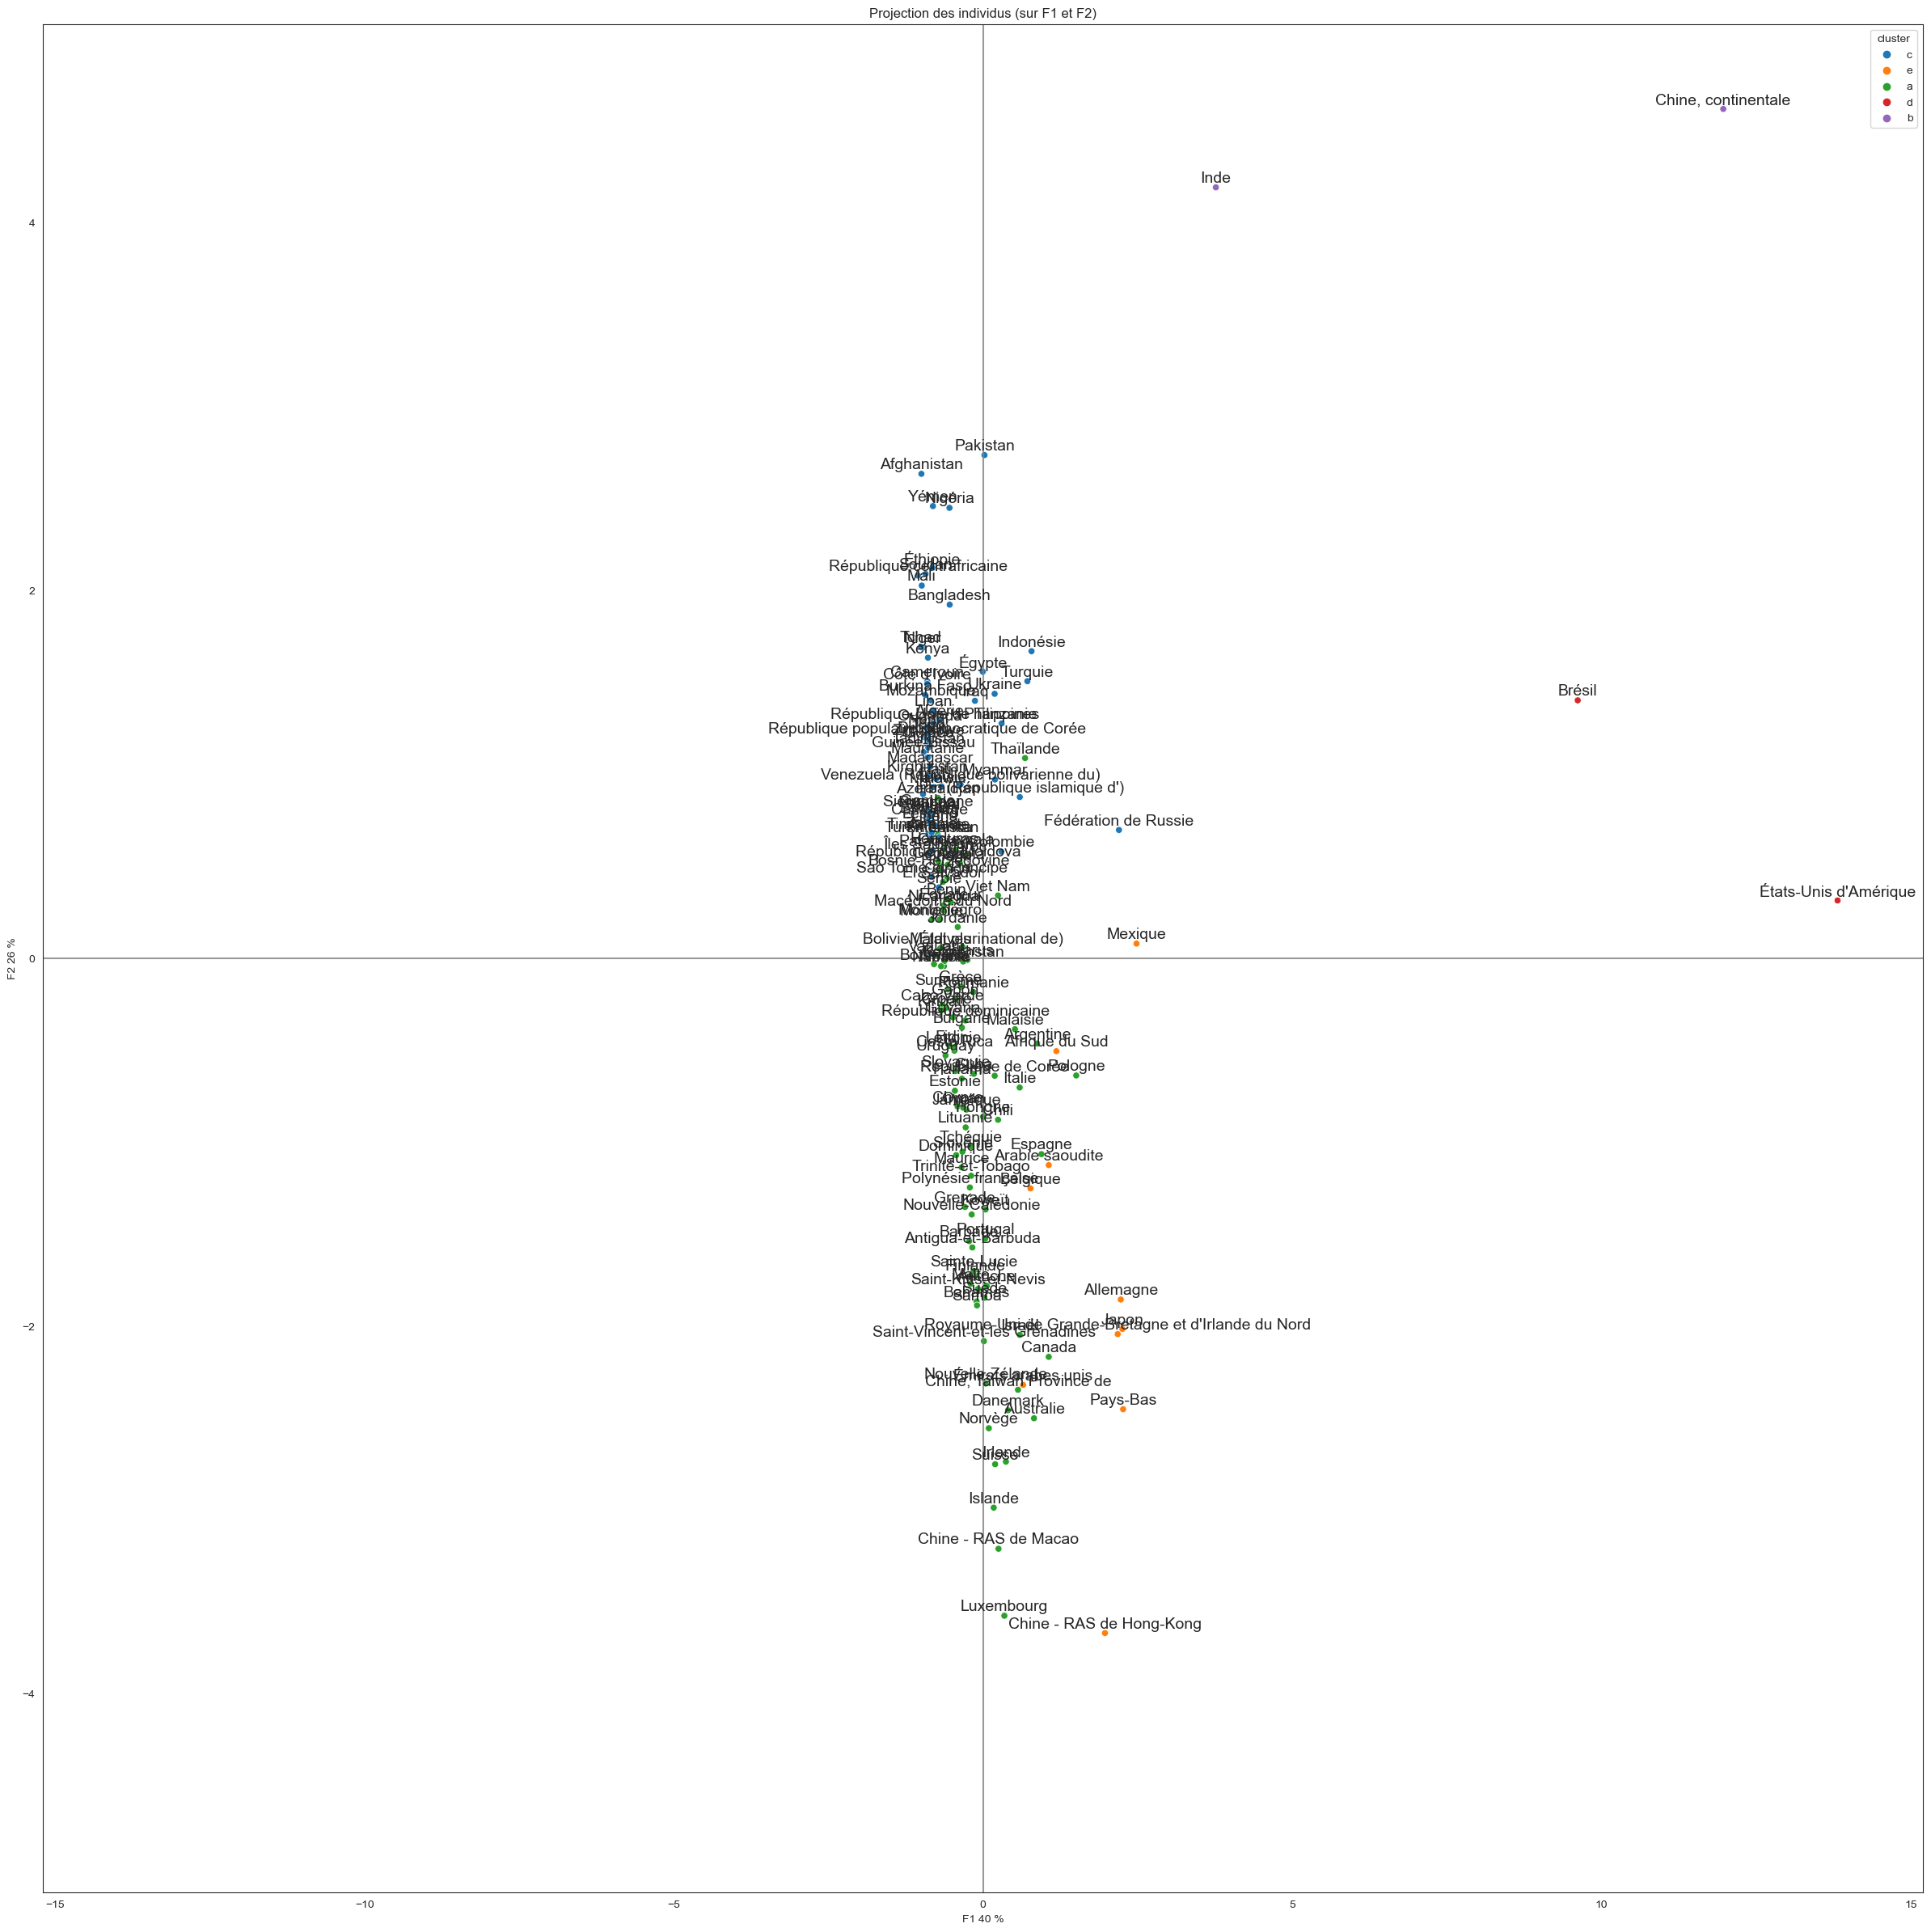

In [372]:
#Projection des pays de chaque cluster sur le premier plan factoriel(F1 F2)
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=Zone, figsize=(30,30), clusters=df['cluster'], marker="o")

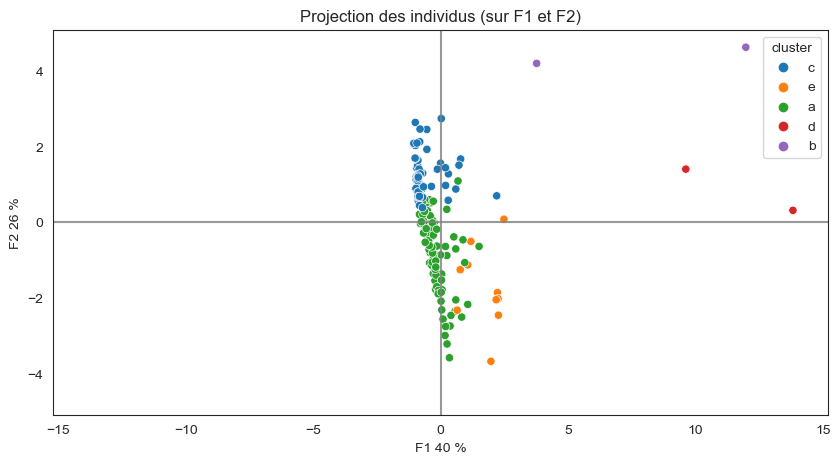

In [373]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,5), clusters=df['cluster'], marker="o")

==>a est le cluster avec les pays ou le nombre de la  population n'est pas trés elevé,une bonne disponibilité interieure,ils exporte mais pas enormement,il importe produisent leur Pib est assez élevé et se sont des pays plus ou mois stable 
==>b est le cluster une faible disponubilité interieure ,il exporte pas beaucou^p une faible production pas beaucoup d'importation un pib assez élevé et des pays stable 
==>cet d sont les deux cluster ou il faut pas concentré nos efforts et faire des investissemnet car se sont les deux cluster qui presente les pays les plus instable 
==>e le cluster avec les pays qui produisent beaucoup un Pib bien élevé on une forte disponibilté interieure exporte beaucoup et une faible importation 

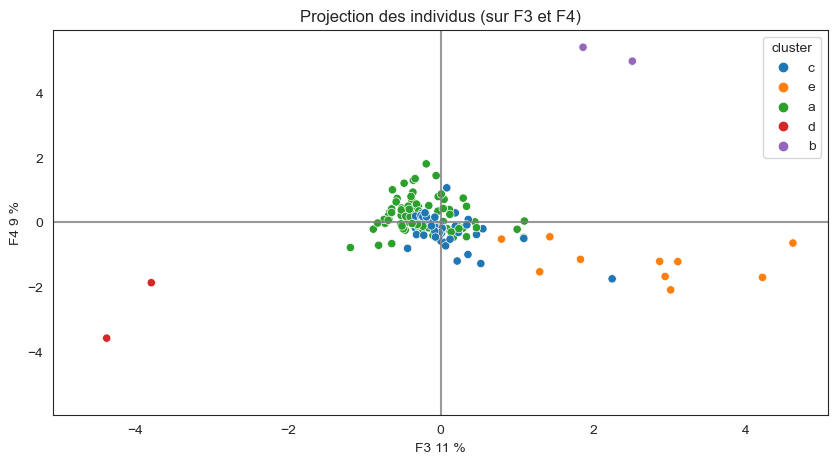

In [374]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,5), clusters=df['cluster'], marker="o")

## 3.2 clustering avec l'algorithme de Kmeans

In [375]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [376]:
kmeans = KMeans(n_clusters=10)

In [377]:
#Application de la methode du coude pour detrminer le nombre de classe optimale

In [378]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

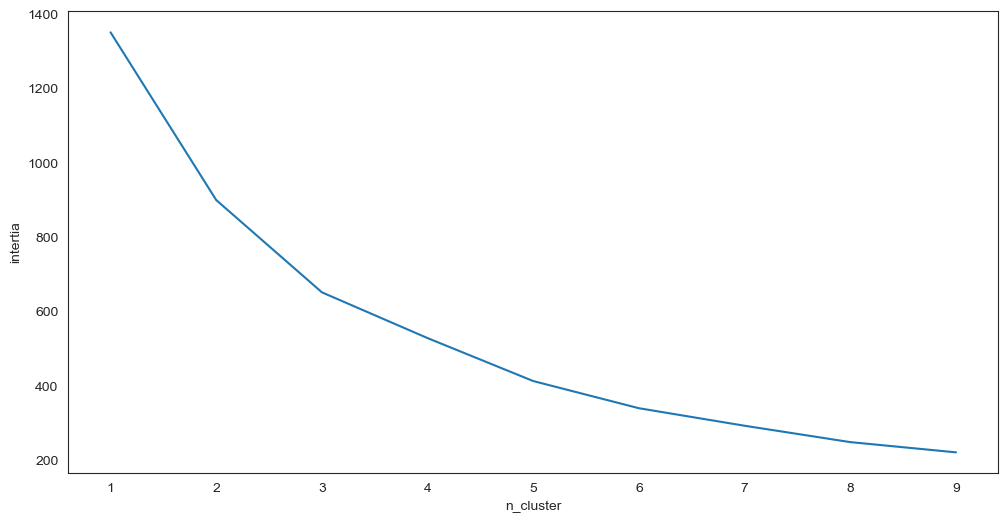

In [379]:
#Graphique affichant l'inertie intraclasse avec la methode du coude 
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [380]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [381]:
kmeans.labels_

array([2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 3, 0, 2, 2, 2, 2, 0, 0, 1, 0, 4, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 4, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2])

In [382]:
dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [383]:
labels = [dd[i] for i in kmeans.labels_]
labels[:5]

['c', 'b', 'c', 'c', 'b']

In [384]:
df.head()

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster
Zone,,,,,,,,,
Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80,c
Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28,e
Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38,a
Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92,c
Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59,e


In [385]:
df['cluster_1'] = labels
df

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80,c,c
Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28,e,b
Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38,a,c
Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92,c,c
Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59,e,b
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),29402484.0,7.23,626.0,0.0,25.0,600.0,8112.053374,-1.27,c,c
Viet Nam,94600648.0,4.01,1206.0,1.0,291.0,918.0,2992.071534,0.23,a,c
Yémen,27834819.0,3.04,246.0,0.0,78.0,168.0,612.353054,-2.94,c,c


In [386]:
#Affichage du nombre de pays dans chaque cluster
df['cluster_1'].value_counts()

c    99
a    58
b     8
d     2
e     2
Name: cluster_1, dtype: int64

In [387]:
#calcule de la moyenne mondiale pour chaque variable 
df.mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\1187096352.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


population                                                  4.280226e+07
Disponibilité de protéines en quantité (g/personne/jour)    7.130059e+00
Disponibilité intérieure                                    6.733432e+02
Exportations - Quantité                                     1.030592e+02
Importations - Quantité                                     8.671006e+01
Production                                                  7.018757e+02
Pib_par_habitant                                            1.425435e+04
stabilité_politique                                        -6.065089e-02
dtype: float64

In [388]:
#Audit des clusters
df.groupby('cluster_1').describe()

population                                                          \
               count          mean           std           min           25%   
cluster_1                                                                      
a               58.0  9.725800e+06  1.426933e+07  5.204500e+04  6.607442e+05   
b                8.0  6.451307e+07  4.552035e+07  7.306322e+06  2.908122e+07   
c               99.0  2.889661e+07  4.606004e+07  0.000000e+00  4.034200e+06   
d                2.0  2.664593e+08  8.290893e+07  2.078338e+08  2.371466e+08   
e                2.0  1.379849e+09  5.822671e+07  1.338677e+09  1.359263e+09   

                                                     \
                    50%           75%           max   
cluster_1                                             
a          4.683981e+06  1.019262e+07  6.067370e+07   
b          6.186861e+07  9.318814e+07  1.275027e+08   
c          1.143344e+07  2.926197e+07  2.646510e+08   
d          2.664593e+08  2.957720e+08  3.250848e+08   
e          1.379849e+09  1.400436e+09  1.421022e+09   

          Disponibilité de protéines en quantité (g/personne/jour)             \
                                                             count       mean   
cluster_1                                                                       
a                                                       58.0        11.876724   
b                                                        8.0        12.331250   
c                                                       99.0         3.809697   
d                                                        2.0        17.805000   
e                                                        2.0         2.355000   

           ... Pib_par_habitant                stabilité_politique            \
           ...              75%            max               count      mean   
cluster_1  ...                                                                 
a          ...     43339.773303  110203.008207                58.0  0.725862   
b          ...     44937.037514   55088.600000                 8.0  0.275000   
c          ...      4990.571826   18690.624484                99.0 -0.541515   
d          ...     46768.876680   59059.596403                 2.0 -0.090000   
e          ...     11167.106136   14243.500000                 2.0 -0.380000   

                                                        
                std   min     25%    50%     75%   max  
cluster_1                                               
a          0.445406 -0.89  0.3975  0.795  1.0075  1.60  
b          0.750638 -0.80 -0.3700  0.490  0.8725  1.11  
c          0.788655 -2.94 -0.9300 -0.380 -0.0200  1.02  
d          0.537401 -0.47 -0.2800 -0.090  0.1000  0.29  
e          0.537401 -0.76 -0.5700 -0.380 -0.1900  0.00  

[5 rows x 64 columns]

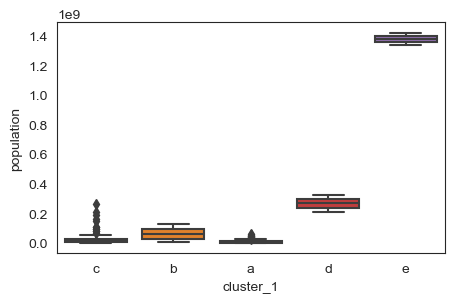

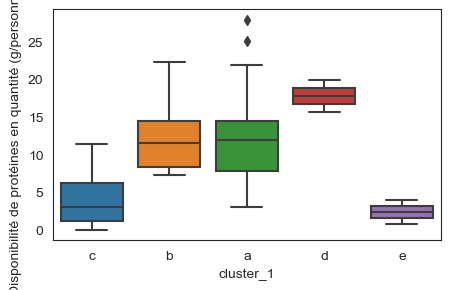

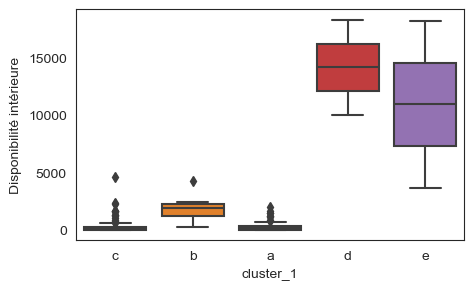

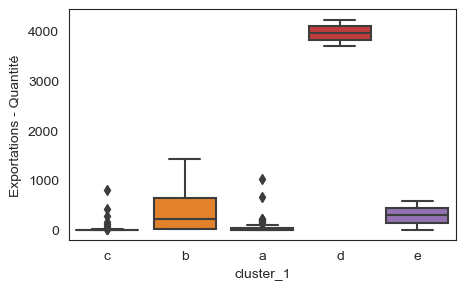

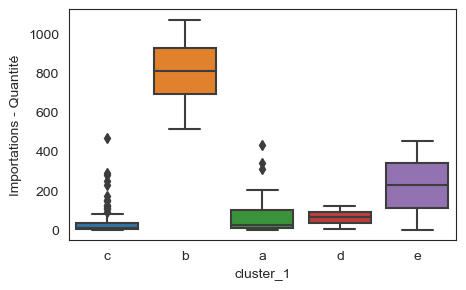

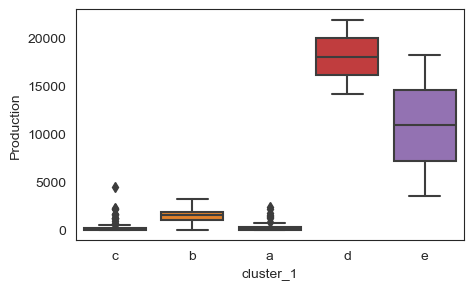

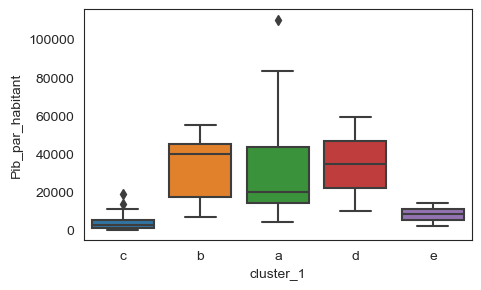

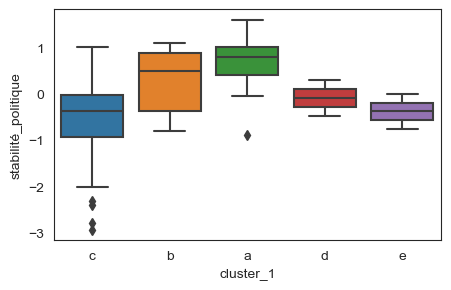

In [389]:
#Réalisation des boxplot pour chaque cluster
cluster_1=['a','b','c','d','e']
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'population', data=df)
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'Disponibilité de protéines en quantité (g/personne/jour)', data=df)
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'Disponibilité intérieure', data=df)
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'Exportations - Quantité', data=df)
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'Importations - Quantité', data=df)
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'Production', data=df)
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'Pib_par_habitant', data=df)
plt.subplots(figsize=(5,3))
ax = sns.boxplot(x='cluster_1', y= 'stabilité_politique', data=df)
plt.show()

In [390]:
df['cluster_1'].value_counts()

c    99
a    58
b     8
d     2
e     2
Name: cluster_1, dtype: int64

In [391]:
#Identification des pays de cluster a
df.loc[df['cluster_1']=='a',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Antigua-et-Barbuda,95426.0,17.77,7.0,0.0,7.0,0.0,16110.556281,0.75,a,a
Argentine,43937140.0,13.53,1962.0,207.0,8.0,2161.0,14609.783370,0.17,a,a
Australie,24584620.0,16.60,1171.0,42.0,16.0,1269.0,57430.803788,0.90,a,a
Autriche,8819901.0,7.49,173.0,78.0,110.0,148.0,47429.535841,1.05,a,a
Bahamas,381755.0,14.61,26.0,4.0,24.0,6.0,30969.876197,0.99,a,a
Barbade,286232.0,15.33,17.0,0.0,2.0,15.0,17843.196496,0.97,a,a
Belgique,11419748.0,4.57,152.0,656.0,338.0,463.0,44162.256256,0.43,e,a
Bulgarie,7102444.0,8.74,157.0,45.0,108.0,107.0,8242.455771,0.33,a,a
Canada,36732095.0,13.86,1433.0,163.0,182.0,1417.0,45125.109808,1.10,a,a


In [392]:
#Affichage la moyenne des variables du cluster a
df.loc[df['cluster_1']=='a',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\980960868.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster_1']=='a',:].mean()


population                                                  9.725800e+06
Disponibilité de protéines en quantité (g/personne/jour)    1.187672e+01
Disponibilité intérieure                                    3.086207e+02
Exportations - Quantité                                     6.308621e+01
Importations - Quantité                                     6.532759e+01
Production                                                  3.244310e+02
Pib_par_habitant                                            2.956962e+04
stabilité_politique                                         7.258621e-01
dtype: float64

===>Cluster a: 100 pays instable et PIB très bas nombre de population pas élevé, disponibilité intérieure faible, il n'exporte pas, il importe mais pas énormément.
==>L’ investissement pas intéressant dans ses pays.


In [393]:
#Identification des pays de cluster b
df.loc[df['cluster_1']=='b',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28,e,b
Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59,e,b
Arabie saoudite,33101179.0,15.57,1435.0,10.0,722.0,616.0,20138.146333,-0.64,e,b
Chine - RAS de Hong-Kong,7306322.0,22.26,280.0,663.0,907.0,24.0,45737.483211,0.83,e,b
Japon,127502725.0,7.24,2415.0,10.0,1069.0,2215.0,38928.952604,1.11,e,b
Mexique,124777324.0,9.26,4219.0,9.0,972.0,3249.0,9434.378179,-0.80,e,b
Pays-Bas,17021347.0,8.48,372.0,1418.0,608.0,1100.0,55088.600000,1.00,e,b
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,66727461.0,13.77,2234.0,359.0,779.0,1814.0,40617.679070,0.39,e,b


==>Cluster b: 2 pays  PIB élevé , forte production, forte exportation, forte disponibilité et faible importation
==>L’investissent n’est important pays autosatisfait.


In [394]:
#Affichage la moyenne des variables du cluster b
df.loc[df['cluster_1']=='b',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\1630091297.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster_1']=='b',:].mean()


population                                                  6.451307e+07
Disponibilité de protéines en quantité (g/personne/jour)    1.233125e+01
Disponibilité intérieure                                    1.851500e+03
Exportations - Quantité                                     3.972500e+02
Importations - Quantité                                     8.016250e+02
Production                                                  1.524875e+03
Pib_par_habitant                                            3.266742e+04
stabilité_politique                                         2.750000e-01
dtype: float64

In [395]:
#Identification des pays de cluster c
df.loc[df['cluster_1']=='c',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80,c,c
Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38,a,c
Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92,c,c
Angola,29816766.0,3.60,319.0,0.0,277.0,42.0,4042.681403,-0.38,a,c
Arménie,2944791.0,5.44,47.0,0.0,35.0,11.0,4041.995072,-0.62,a,c
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),29402484.0,7.23,626.0,0.0,25.0,600.0,8112.053374,-1.27,c,c
Viet Nam,94600648.0,4.01,1206.0,1.0,291.0,918.0,2992.071534,0.23,a,c
Yémen,27834819.0,3.04,246.0,0.0,78.0,168.0,612.353054,-2.94,c,c


In [396]:
#Affichage la moyenne des variables du cluster c
df.loc[df['cluster_1']=='c',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\3540306601.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster_1']=='c',:].mean()


population                                                  2.889661e+07
Disponibilité de protéines en quantité (g/personne/jour)    3.809697e+00
Disponibilité intérieure                                    3.132626e+02
Exportations - Quantité                                     2.106061e+01
Importations - Quantité                                     3.913131e+01
Production                                                  3.000505e+02
Pib_par_habitant                                            3.509808e+03
stabilité_politique                                        -5.415152e-01
dtype: float64

==>cluster c: 8 pays stable Pib élevé ,forte importation, forte disponibilité en proteine, faible production est pas beaucoup d'exportation.
==>Investissement intéressant 


In [397]:
#Identification des pays de cluster d
df.loc[df['cluster_1']=='d',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Brésil,207833823.0,15.68,9982.0,4223.0,3.0,14201.0,9896.717511,-0.47,d,d
États-Unis d'Amérique,325084756.0,19.93,18266.0,3692.0,123.0,21914.0,59059.596403,0.29,d,d


In [398]:
#Affichage la moyenne des variables du cluster d
df.loc[df['cluster_1']=='d',:].mean()

C:\Users\hajer\AppData\Local\Temp\ipykernel_42872\2644886893.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df['cluster_1']=='d',:].mean()


population                                                  2.664593e+08
Disponibilité de protéines en quantité (g/personne/jour)    1.780500e+01
Disponibilité intérieure                                    1.412400e+04
Exportations - Quantité                                     3.957500e+03
Importations - Quantité                                     6.300000e+01
Production                                                  1.805750e+04
Pib_par_habitant                                            3.447816e+04
stabilité_politique                                        -9.000000e-02
dtype: float64

==>Cluster d:58 pays stable PIB élevé faible production, faible importation et très faible exportation, faible disponibilité , faible population, bonne consommation
==>L'investissement peut être intéressant dans ces pays.


In [399]:
#Identification des pays de cluster e
df.loc[df['cluster_1']=='e',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
"Chine, continentale",1.421022e+09,3.96,18161.0,576.0,452.0,18236.0,14243.500000,0.00,b,e
Inde,1.338677e+09,0.75,3661.0,4.0,0.0,3545.0,1937.924543,-0.76,b,e


==>Cluster e: 1 seul pays pas trop stable avec un PIB pas trop élevé 
==> on va pas investir dans un seul pays 

## 4 Projection

In [400]:
# On instancie notre Kmeans avec 5 clusters : 
kmeans = KMeans(n_clusters=5)

# On l'entraine : 
kmeans.fit(X_scaled)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels

C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hajer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 4, 0, 0, 4, 0, 2, 4, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 4, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 2, 2, 2, 2, 4, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 4, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 4, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [401]:
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids

array([[-0.09031805, -0.58948736, -0.16473832, -0.17844171, -0.25858898,
        -0.16160414, -0.54896119, -0.53474064],
       [ 1.45266557,  1.89519768,  6.15373019,  8.38786646, -0.12886342,
         6.98000138,  1.03327596, -0.03263741],
       [-0.21483356,  0.84270897, -0.16686203, -0.08698743, -0.11621307,
        -0.15179889,  0.78248858,  0.87463444],
       [ 8.68419917, -0.84775   ,  4.68376962,  0.4068125 ,  0.75703643,
         4.09761183, -0.31491328, -0.35512922],
       [ 0.14101295,  0.92340416,  0.53901153,  0.64020528,  3.88554012,
         0.33098988,  0.94076185,  0.37325746]])

In [402]:
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [403]:
X_proj = pca.transform(X_scaled)
X_proj[:4]

array([[-0.99646619,  2.63368843,  0.35779135, -0.9987808 ],
       [ 1.18601533, -0.50615777,  1.83243317, -1.14814275],
       [-0.63134617, -0.04384416, -0.24528099,  0.14056627],
       [-0.70391813,  1.29477159, -0.07681401, -0.07074451]])

In [404]:
X_proj = pd.DataFrame(X_proj, columns = ['PC1', 'PC2','PC3','PC4'])
X_proj[:4]

,PC1,PC2,PC3,PC4
0,-0.996466,2.633688,0.357791,-0.998781
1,1.186015,-0.506158,1.832433,-1.148143
2,-0.631346,-0.043844,-0.245281,0.140566
3,-0.703918,1.294772,-0.076814,-0.070745


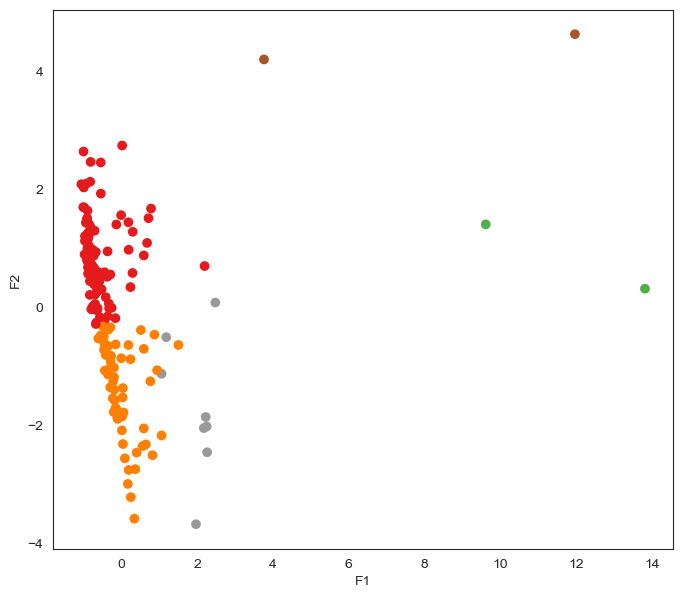

In [405]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [406]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2","F3","F4"], index=["a", "b", "c","d","e"])

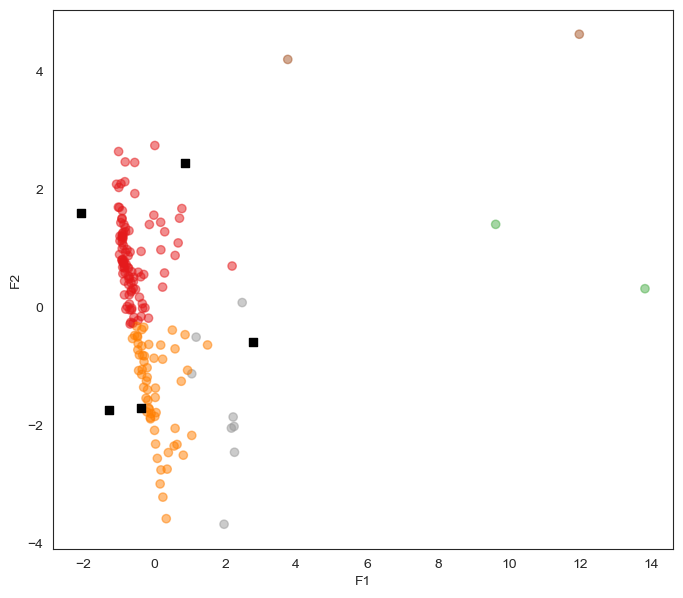

In [407]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

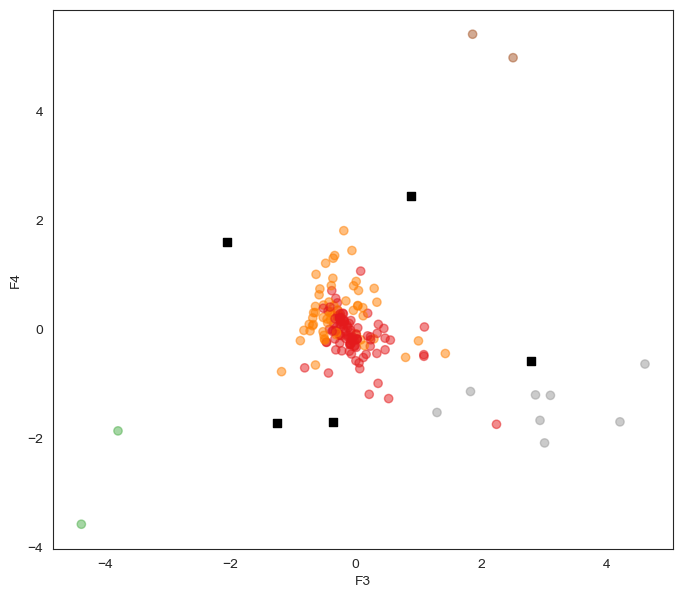

In [408]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 2], X_proj.iloc[:, 3], c= labels, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F3")
ax.set_ylabel("F4")
plt.show()

==>la projection des centroïdes sur les deux plans factoriels montre bien que les 5 centroïdes sont bien éloignés ce qui confirme que l'inertie interclasse élevé , inertie infraclasse faible.
==>les  5 clusters sont bien différents et les individus de chaque cluster sont bien similaires. 



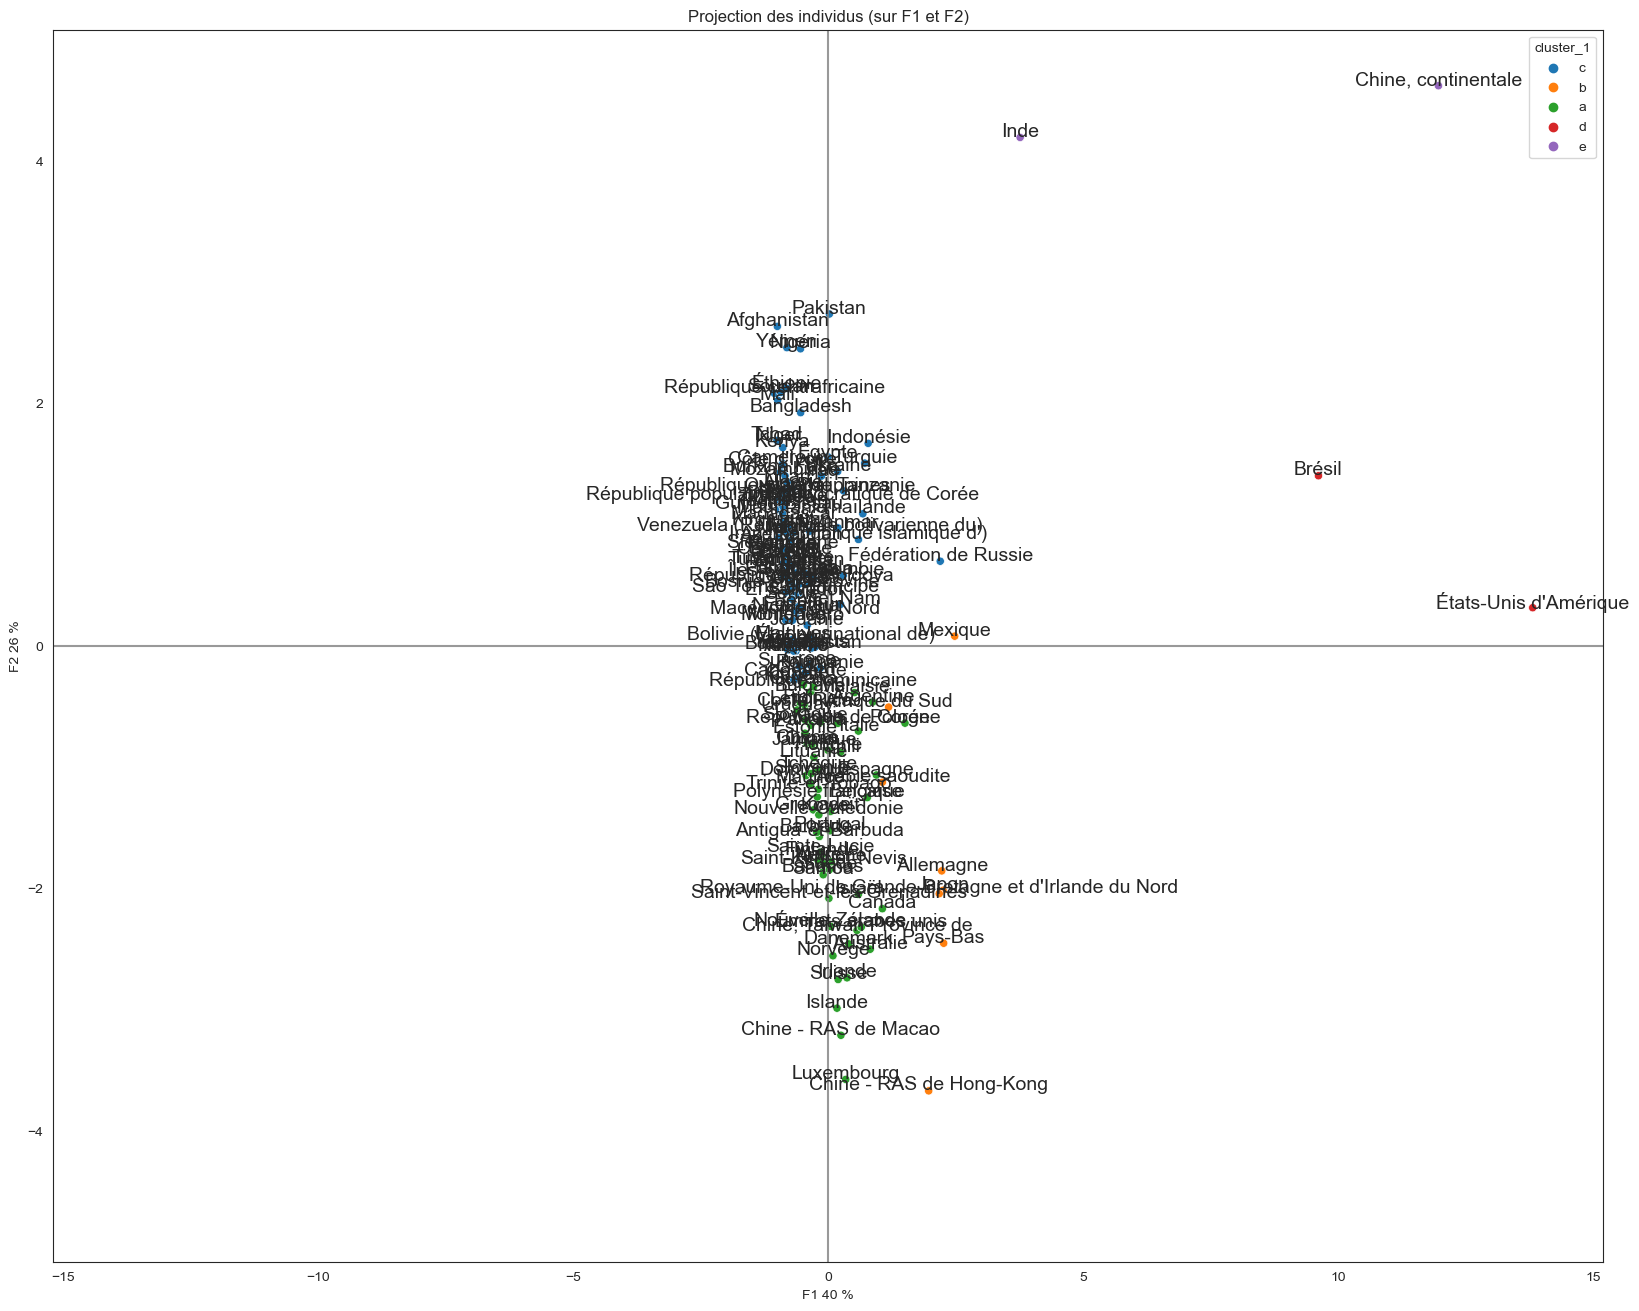

In [409]:
#Projection des pays de chaque cluster sur le premier plan factorirl (F1 F2)
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=Zone, figsize=(20,16), clusters=df['cluster_1'], marker="o")

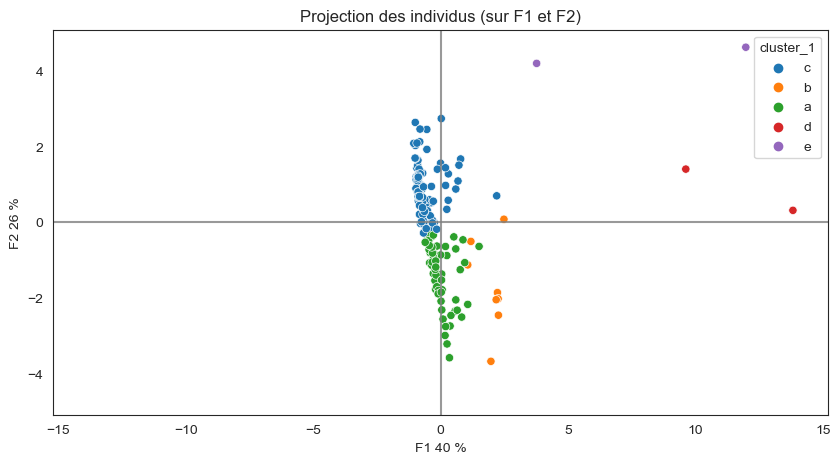

In [410]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,5), clusters=df['cluster_1'], marker="o")

==>la projection des clusters sur le premier plan factoriel confirme que les cluster c et d sont les plus corréles avec F2 ,
c'est a dire les pays stable on un PIB élevé et une bonne consommation de protéine.

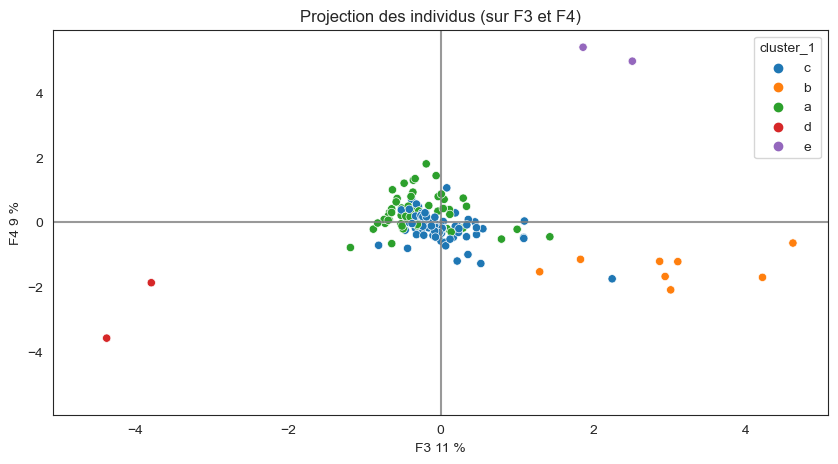

In [411]:
#Projection des pays de chaque cluster sur le deuxieme  plan factorirl (F3 F4)
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(10,5), clusters=df['cluster_1'], marker="o")

==>la projection des clusters sur le deuxieme plan factoriel montre que le cluster c a une forte exportation contrairement
au cluster d alors que la population est plus elevé dans le cluster d qui est corréles avec F4
==>population plus elevé ça veut dire plus de consommation de poulet en plus le cluster d n'importe pas beaucoup 
==> l'investissement est plus interessant dans les pays du cluster d

In [412]:
## 5 Identification des pays d'investissement 
df.loc[df['cluster']=='e',:]


,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28,e,b
Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59,e,b
Arabie saoudite,33101179.0,15.57,1435.0,10.0,722.0,616.0,20138.146333,-0.64,e,b
Belgique,11419748.0,4.57,152.0,656.0,338.0,463.0,44162.256256,0.43,e,a
Chine - RAS de Hong-Kong,7306322.0,22.26,280.0,663.0,907.0,24.0,45737.483211,0.83,e,b
Émirats arabes unis,9487203.0,14.80,412.0,94.0,433.0,48.0,42522.377617,0.62,e,a
Japon,127502725.0,7.24,2415.0,10.0,1069.0,2215.0,38928.952604,1.11,e,b
Mexique,124777324.0,9.26,4219.0,9.0,972.0,3249.0,9434.378179,-0.80,e,b
Pays-Bas,17021347.0,8.48,372.0,1418.0,608.0,1100.0,55088.600000,1.00,e,b


In [413]:
#CAH
df.loc[df['cluster']=='e',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Afrique du Sud,57009756.0,14.11,2118.0,63.0,514.0,1667.0,6723.928582,-0.28,e,b
Allemagne,82658409.0,7.96,1739.0,646.0,842.0,1514.0,44670.222282,0.59,e,b
Arabie saoudite,33101179.0,15.57,1435.0,10.0,722.0,616.0,20138.146333,-0.64,e,b
Belgique,11419748.0,4.57,152.0,656.0,338.0,463.0,44162.256256,0.43,e,a
Chine - RAS de Hong-Kong,7306322.0,22.26,280.0,663.0,907.0,24.0,45737.483211,0.83,e,b
Émirats arabes unis,9487203.0,14.80,412.0,94.0,433.0,48.0,42522.377617,0.62,e,a
Japon,127502725.0,7.24,2415.0,10.0,1069.0,2215.0,38928.952604,1.11,e,b
Mexique,124777324.0,9.26,4219.0,9.0,972.0,3249.0,9434.378179,-0.80,e,b
Pays-Bas,17021347.0,8.48,372.0,1418.0,608.0,1100.0,55088.600000,1.00,e,b


In [414]:
#Kmeans
df.loc[df['cluster_1']=='c',:]

,population,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Pib_par_habitant,stabilité_politique,cluster,cluster_1
Zone,,,,,,,,,,
Afghanistan,36296113.0,0.54,57.0,0.0,29.0,28.0,530.149831,-2.80,c,c
Albanie,2884169.0,6.26,47.0,0.0,38.0,13.0,4521.752217,0.38,a,c
Algérie,41389189.0,1.97,277.0,0.0,2.0,275.0,4134.936055,-0.92,c,c
Angola,29816766.0,3.60,319.0,0.0,277.0,42.0,4042.681403,-0.38,a,c
Arménie,2944791.0,5.44,47.0,0.0,35.0,11.0,4041.995072,-0.62,a,c
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),29402484.0,7.23,626.0,0.0,25.0,600.0,8112.053374,-1.27,c,c
Viet Nam,94600648.0,4.01,1206.0,1.0,291.0,918.0,2992.071534,0.23,a,c
Yémen,27834819.0,3.04,246.0,0.0,78.0,168.0,612.353054,-2.94,c,c


==>le cluster e du CAH et le cluster c du Kmeans ont donné des les même pays , seulement deux en plus avec la CAH
==>J'ai decidé de choisir les pays du cluster e du CAH ( car l'investissement est aussi intéressant en Belgique et Émirats arabes unis)
